# Credit Score Classification

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway, boxcox

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import optuna
import joblib

In [16]:
pd.set_option('display.max_column', None)

## Reading the data into python

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
credit = (pd.read_csv("G:/Study material/Data Science/ML/Classification/Classification_Course_Materials/Data/credit_train_clean.csv")
             .drop(["Name", "SSN", "ID", "Customer_ID"], axis=1))

credit.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [19]:
df = credit.copy()

df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [20]:
df.shape

(100000, 24)

 Data contain one file and it consists 100000 records and 24 columns

 The goal is to learn from the data and classify the Credit Score of person i.e. either good or bad

## Defining a problem statement

<b>Create a predictive model which can classify the credit score of a person</b>

* <b>Target Variable</b>: Credit Score


## Determining the type of machine learning

Based on problem statement and looking at a data, we need to use Supervised Classification models to predict required output


## Basic data exploration

* Check the datatypes of features
* Identify which features are quantitative, categorical and qualitative
* Remove useless features

In [21]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

* 6 columns are categorical and all others are numberical
* Datatype of all the columns are correct, we don't need to do any changes

In [22]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## Missing value Treatment

In [23]:
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## Outlier Treatment

We will treat the outliers when we are doing data exploratory analysis for each features

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot 
* Continuous variables: Histogram

### Credit_score

In [24]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

Here we want only two categories for prediction so we will groupe good and standard category into one

In [25]:
target_dict = {'Standard':"Good",
              "Good":"Good",
              "Poor":"Poor"}

df["Credit_Score"] = df["Credit_Score"].map(target_dict)

df["Credit_Score"].value_counts()

Credit_Score
Good    71002
Poor    28998
Name: count, dtype: int64

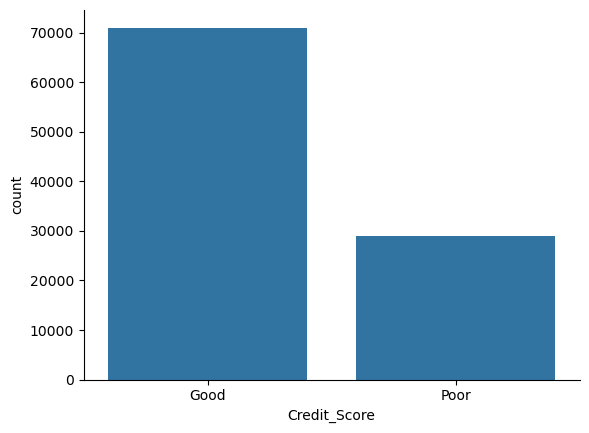

In [26]:
## Now we will see the distribution of Target variable using bar chart

sns.countplot(x=df["Credit_Score"])

sns.despine()

* By looking at above bar chart we can say distribution of the categories are very good for prediction. 
* Data is not imbalanced but at the end we will try some imbalanced techniques and will see the prediction

In [27]:
df["Credit_Score"] = np.where(df["Credit_Score"] == 'Good', 1 , 0)

In [28]:
df['Credit_Score'] = df['Credit_Score'].astype('category')

### Month

In [29]:
df["Month"].nunique()

8

* We have only 8 categories, therefore, it is a categorical variable (Discrete variable)
* We will use bar plot to check the frequency of each category
* We will use Box Plot and Chi-square test to check correlation with target variable

In [30]:
plt.rcParams['figure.figsize']=[7,3]

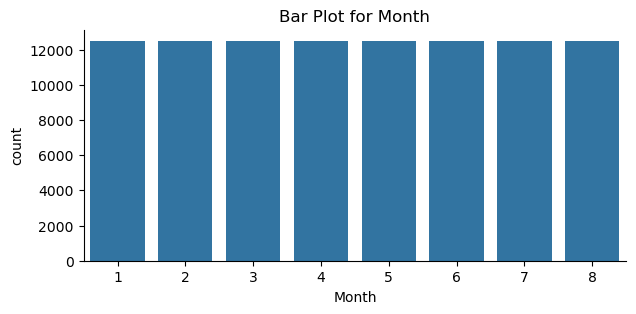

In [31]:
sns.countplot(x=df["Month"])

plt.title("Bar Plot for Month")
sns.despine()

* Frequency of each month is same. Hence, this variable can be useful for ML model

In [32]:
df["Month"].value_counts()

Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64

In [33]:
## Function to plot grouped bar chart of predictor vs target variable

def cat_variable_plot(data, predictor, target):
    
    ## Group bar plot of paredictor and target variable
    sns.countplot(x=data[predictor], hue=df[target], palette='muted')   
    plt.title(f'Grouped Bar Chart of {predictor} vs {target}')
    plt.legend(bbox_to_anchor=(1,1))
    sns.despine()
    plt.show()    

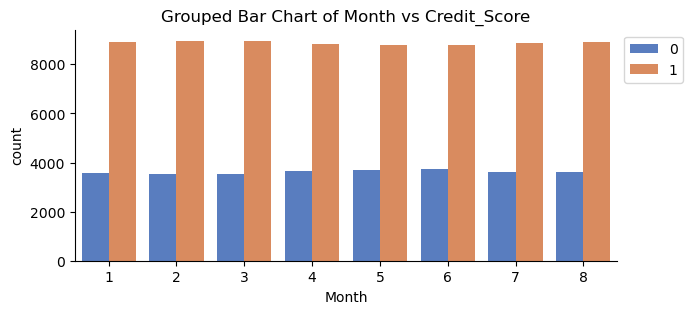

In [34]:
cat_variable_plot(df, 'Month', 'Credit_Score')

* The ratio is look like similar across all the categories.
* Maybe this variable is not has relationship with target variable.
* We will confirm this by using statistical test i.e. Chi-square test

In [35]:
def chi2_test(data, predictor, target):
    ## Statistical test to check the correlation between predictor and target variable
    print('Chi-square Test:', '\n')
    print('* Chi-square test used to check the correlation between two categorical variables.','\n')
    print('        * Null Hypothesis(H0): There is NO relationship between two variables')
    print('        * Alternative Hypothesis(H1): There is a significant relationship between two variables', '\n')
    print('Here we will try to reject the Null Hypothesis based on p-value', '\n')
    contingency_table = pd.crosstab(data[predictor], data[target])    
    result = chi2_contingency(contingency_table)
    print('Chi-Square Score:')
    print(result, '\n')
    
    ## Check the p_value
    if result[1] < 0.05:
        print(f'* P_value = {result[1]}. It is a less than 0.05, it means we can reject the Null Hypothesis')
        print(f'* There is a significan relationship between {predictor} and {target}')
    else:
        print(f'* P_value = {result[1]}. It is a greater than 0.05, it means we fail to reject the Null Hypothesis')
        print(f'* There is NO relationship between {predictor} and {target}')

In [36]:
chi2_test(df, 'Month', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=13.8222249257808, pvalue=0.05443511640871347, dof=7, expected_freq=array([[3624.75, 8875.25],
       [3624.75, 8875.25],
       [3624.75, 8875.25],
       [3624.75, 8875.25],
       [3624.75, 8875.25],
       [3624.75, 8875.25],
       [3624.75, 8875.25],
       [3624.75, 8875.25]])) 

* P_value = 0.05443511640871347. It is a greater than 0.05, it means we fail to reject the Null Hypothesis
* There is NO relationship between Month and Credit_Score


* We will reject `Month` variable

### Age

In [37]:
df["Age"].nunique()

43

* This variable has more than 20 categories that means it is a continuous variable
* We will see the distribution of this variable by using Histogram
* We will check the correlation of this variable with the target variable by plotting Box plot and claculating ANOVA score

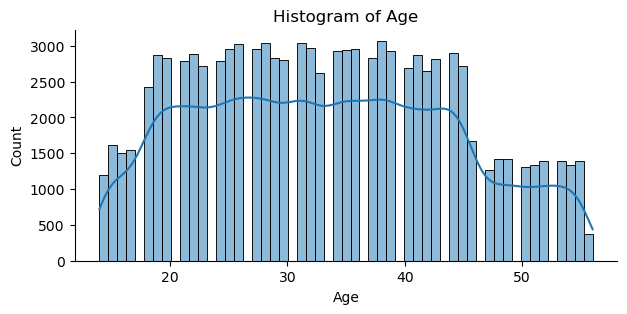

In [38]:
sns.histplot(df["Age"], kde=True)

plt.title('Histogram of Age')
sns.despine()

* The distribution of this variable is near about normal.

In [39]:
def num_variable_plot(data, predictor, target):
    sns.boxplot(x=predictor, y=target, data=data, palette='muted')
    plt.title(f'Box plot of {predictor} vs {target}')
    sns.despine()
    plt.show()

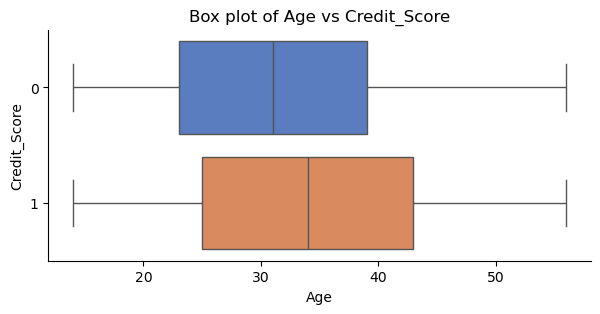

In [40]:
num_variable_plot(df, 'Age', 'Credit_Score')

* Above box plot show the distribution of Age on X-axis and category on Y-axis
* By seeing the box plot we can say that there is no outliers for this variable
* The median value is different for both the categories, it means this variable has some correlation with target, we will confirm the correlation by using statistical test i.e. ANOVA test

In [41]:
def anova_test(data, predictor, target):
    ## Statistical test to check the correlation between predictor and target variable
    print('ANOVA Test:','\n')
    print('Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable.','\n')
    print('        * Null Hypothesis(H0): There is NO relationship between two variables')
    print('        * Alternative Hypothesis(H1): There is a significant relationship between two variables', '\n')
    print('Here we will try to reject the Null Hypothesis based on p-value', '\n')
    
    groups = data.groupby(target)[predictor]
    group_values = [group for name, group in groups]
    result = f_oneway(*group_values)
    print('ANOVA Test Score:')
    print(result, '\n')
    
     ## Check the p_value
    print(f'F-statistics = {result[0]}','\n')
    
    if result[1] < 0.05:
        print(f'* P_value = {result[1]}. It is a less than 0.05, it means we can reject the Null Hypothesis')
        print(f'* There is a significan relationship between {predictor} and {target}')
    else:
        print(f'* P_value = {result[1]}. It is a greater than 0.05, it means we fail to reject the Null Hypothesis')
        print(f'* There is NO relationship between {predictor} and {target}')

In [42]:
anova_test(df, 'Age', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=1612.2223689629814, pvalue=0.0) 

F-statistics = 1612.2223689629814 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Age and Credit_Score


* We will select `Age` variable

### Occupation

In [43]:
df["Occupation"].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

* Each catgory has a similar frequency of data
* This variable can be useful for ML model

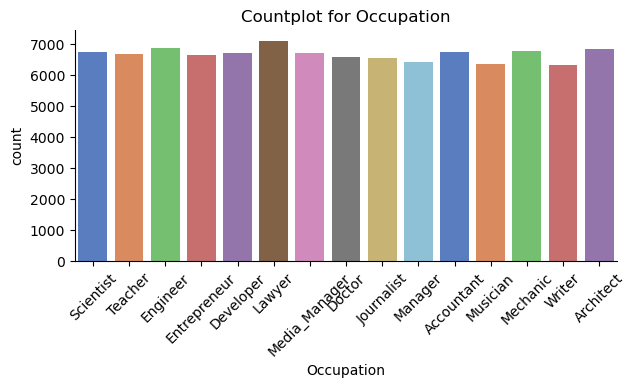

In [44]:
sns.countplot(x=df["Occupation"], palette='muted')

plt.title('Countplot for Occupation')
plt.xticks(rotation=45)
sns.despine()

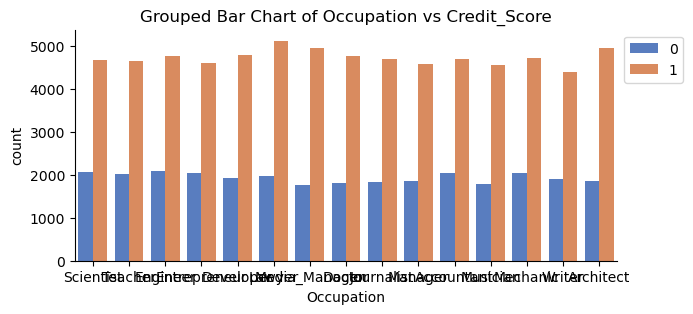

In [45]:
cat_variable_plot(df, 'Occupation', 'Credit_Score')

* Ratio is quite similar across all the categories.
* It looks like this variable is not correlated to target variable
* We will confirm the correlation by using statistical test i.e Chi-Square test

In [46]:
chi2_test(df, 'Occupation','Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=98.17421146949242, pvalue=1.0604738985924247e-14, dof=14, expected_freq=array([[1955.62512, 4788.37488],
       [1978.82352, 4845.17648],
       [1948.6656 , 4771.3344 ],
       [1904.58864, 4663.41136],
       [1990.42272, 4873.57728],
       [1927.78704, 4720.21296],
       [1895.30928, 4640.69072],
       [2057.69808, 5038.30192],
       [1865.15136, 4566.84864],
       [1964.90448, 4811.09552],
       [1948.6656 , 4771.3344 ],
       [1841.95296, 4510.04704],
       [1955.62512, 4788.37488],
       [1934.74656, 4737.25344],
       [1828.03392, 4475.96608]])) 

* P_value = 1.0604738985924247e-1

* We will select the `Occupation` variable

In [47]:
df['Occupation'] = df['Occupation'].astype('category')

### Annual_Income

In [48]:
df["Annual_Income"].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

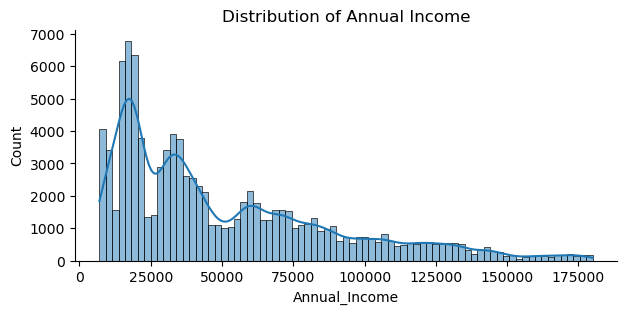

In [49]:
sns.histplot(df["Annual_Income"], kde=True)

plt.title('Distribution of Annual Income')
sns.despine()

* Data is not normally distributed. It is rightly Skewed.
* We will use <b>np.log()</b> to tranform this variable

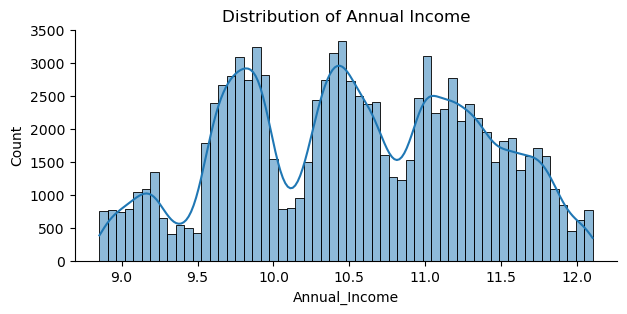

In [50]:
## Logarithmic Transformation

sns.histplot(np.log(df["Annual_Income"]), kde=True)

plt.title('Distribution of Annual Income')
sns.despine()

* Data is not exactly normally distributed after transforming.
* We will check the correlation with target variable for original data and transformed data and then will decide whether we need to transfom the variable or not. 

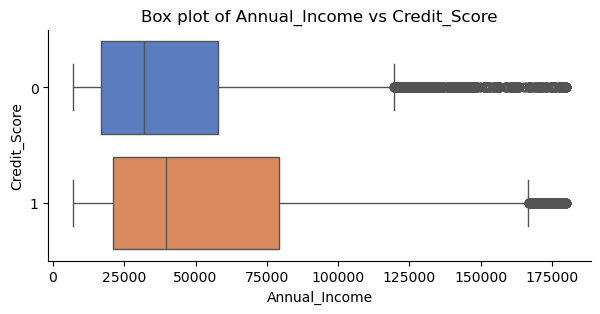

In [51]:
num_variable_plot(df, 'Annual_Income', 'Credit_Score')

* When we use original data for box plot, we are seeing lots of outliers

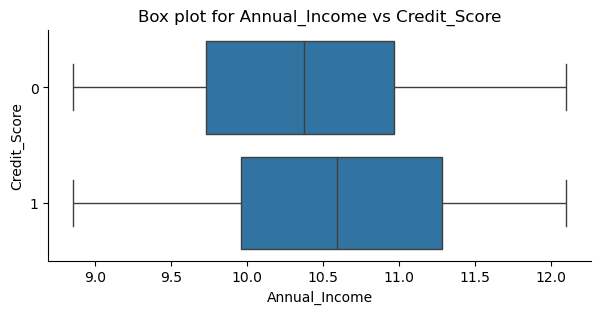

In [52]:
## Logarithmic Transformation

sns.boxplot(x=np.log(df["Annual_Income"]), y="Credit_Score", data=df)

plt.title('Box plot for Annual_Income vs Credit_Score')
sns.despine()

* we used logarithmic transformed data for above box plot and we are not seeing any outliers
* Therefore, we are going to use transfomed data for further analysis and ML model
* The median value of both the categories are different, hence we can say that this variable has a correlation with target variable. We will confirm it by using statistical test i.e. ANOVA Test

In [53]:
## We will add this transfomed variable in the data set

df['Log_Annual_Income'] = np.log(df["Annual_Income"])

df.head(1)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Log_Annual_Income
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,1,9.858183


In [54]:
anova_test(df, 'Annual_Income', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=2817.4241015337116, pvalue=0.0) 

F-statistics = 2817.4241015337116 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Annual_Income and Credit_Score


In [55]:
anova_test(df, 'Log_Annual_Income', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=3183.3212171469227, pvalue=0.0) 

F-statistics = 3183.3212171469227 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Log_Annual_Income and Credit_Score


* We will select `Log_Annual_Income` variable
* F-statistics is higher for transformed variable, therefore, we are selecting this variable 

In [56]:
df.drop('Annual_Income', axis=1, inplace=True)

### Monthly_Inhand_Salary

In [57]:
df['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4197.270835
std        3186.432497
min         303.645417
25%        1626.594167
50%        3095.905000
75%        5957.715000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

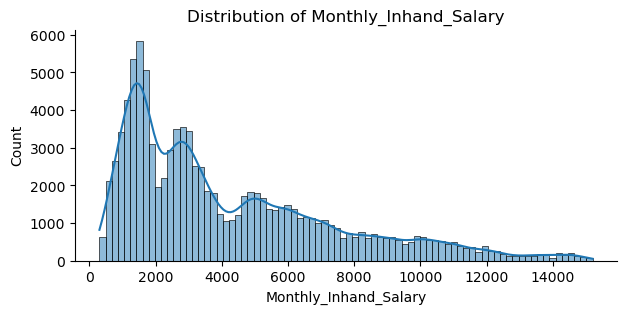

In [58]:
sns.histplot(df['Monthly_Inhand_Salary'], kde=True)

plt.title('Distribution of Monthly_Inhand_Salary')
sns.despine()

* Data is rightly skewed. We will transform this variable.

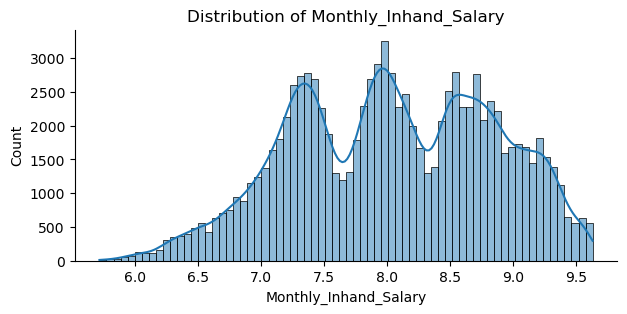

In [59]:
## Logarithmic Transformation

sns.histplot(np.log(df['Monthly_Inhand_Salary']), kde=True)

plt.title('Distribution of Monthly_Inhand_Salary')
sns.despine()

* After transforming varibale, it looks like normal distribution.
* We will do further analysis and will decide which variable to keep

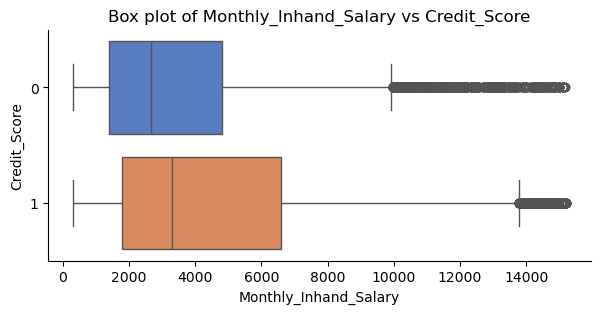

In [60]:
num_variable_plot(df, 'Monthly_Inhand_Salary', 'Credit_Score')

* The median is different for both the categories, therefore, we can say this variable has some correlation with target variable
* We can see outliers also.
* First, we will plot the box plot using transfomed variable, then, we decide about how to treat outliers.

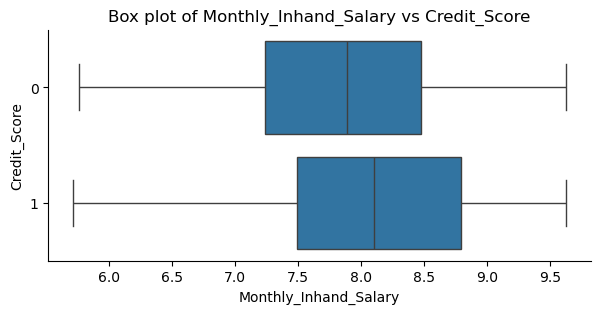

In [61]:
sns.boxplot(x=np.log(df['Monthly_Inhand_Salary']), y='Credit_Score', data=df)

plt.title('Box plot of Monthly_Inhand_Salary vs Credit_Score')
sns.despine()

* After transforming variable, we are not seeing any outliers. 
* Trandformed variable is also kind of normally distributed.
* Therefore, we will choose this transformed variable for further analysis and for ML model

In [62]:
df['Log_Monthly_Inhand_Salary'] = np.log(df['Monthly_Inhand_Salary'])

df.head(1)

,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Log_Annual_Income,Log_Monthly_Inhand_Salary
0,1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,1,9.858183,7.509249


In [63]:
anova_test(df,'Monthly_Inhand_Salary', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=2756.96408352293, pvalue=0.0) 

F-statistics = 2756.96408352293 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Monthly_Inhand_Salary and Credit_Score


In [64]:
anova_test(df,'Log_Monthly_Inhand_Salary', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=3063.4265590935574, pvalue=0.0) 

F-statistics = 3063.4265590935574 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Log_Monthly_Inhand_Salary and Credit_Score


* <b>F-Statistic</b> is high for transformed variable so we will choose transformes variable.
* We are seleting `Log_Monthly_Inhand_Salary` variable

In [65]:
df.drop('Monthly_Inhand_Salary',axis=1, inplace=True)

### Num_Bank_Accounts

In [66]:
df['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6.0     13175
7.0     12999
8.0     12940
4.0     12343
5.0     12298
3.0     12107
9.0      5503
10.0     5329
1.0      4540
0.0      4417
2.0      4340
11.0        9
Name: count, dtype: int64

* There is one rare label here. We have to treat this rare label because this could cause the problem for ML model
* Only 9 users have 11 accounts. We can remove this observations or we can combine 10 and 11 acounts categories into one.
* Here we will combine the two categories (10 and 11) into one


In [67]:
df['Num_Bank_Accounts'].replace(11, 10, inplace=True)

df['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6.0     13175
7.0     12999
8.0     12940
4.0     12343
5.0     12298
3.0     12107
9.0      5503
10.0     5338
1.0      4540
0.0      4417
2.0      4340
Name: count, dtype: int64

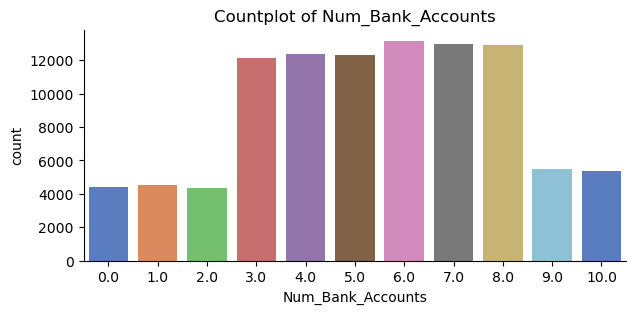

In [68]:
sns.countplot(x=df['Num_Bank_Accounts'], palette='muted')

plt.title('Countplot of Num_Bank_Accounts')
sns.despine()

* There is enough frequency for each category. 
* We can use this variable for further analysis.

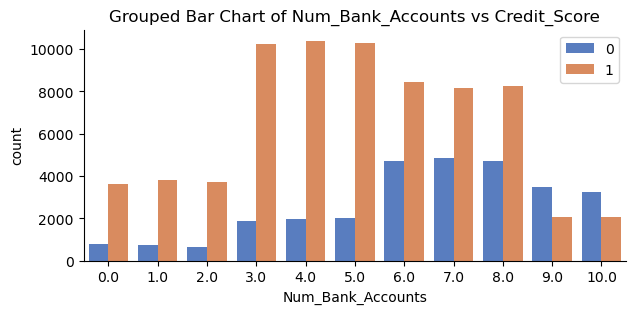

In [69]:
cat_variable_plot(df, 'Num_Bank_Accounts', 'Credit_Score')

* We can see that the ratio is not similar across all the categories.
* From 0 to 8 number of accounts, ratio is similar. But for 9 and 10 we have different ratio from 8 to 9.
* This variable could be useful for ML model
* We will use statistical test to check the association between two variables.

In [70]:
chi2_test(df, 'Num_Bank_Accounts', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=10972.873223894221, pvalue=0.0, dof=10, expected_freq=array([[1280.84166, 3136.15834],
       [1316.5092 , 3223.4908 ],
       [1258.5132 , 3081.4868 ],
       [3510.78786, 8596.21214],
       [3579.22314, 8763.77686],
       [3566.17404, 8731.82596],
       [3820.4865 , 9354.5135 ],
       [3769.45002, 9229.54998],
       [3752.3412 , 9187.6588 ],
       [1595.75994, 3907.24006],
       [1547.91324, 3790.08676]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Num_Bank_Accounts and Credit_Score


* We are selecting `Num_Bank_Accounts` variable

In [71]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('category')

### Num_Credit_Card

In [72]:
df['Num_Credit_Card'].value_counts()

Num_Credit_Card
5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4962
9.0      4753
2.0      2196
1.0      2185
11.0       36
0.0        14
Name: count, dtype: int64

* Here we have two rare categories, 11.0 and 0.0
* We will combine 0.0 with 1.0 and 11.0 with 10.0

In [73]:
df['Num_Credit_Card'].replace({0:1, 11:10}, inplace=True)

df['Num_Credit_Card'].value_counts()

Num_Credit_Card
5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4998
9.0      4753
1.0      2199
2.0      2196
Name: count, dtype: int64

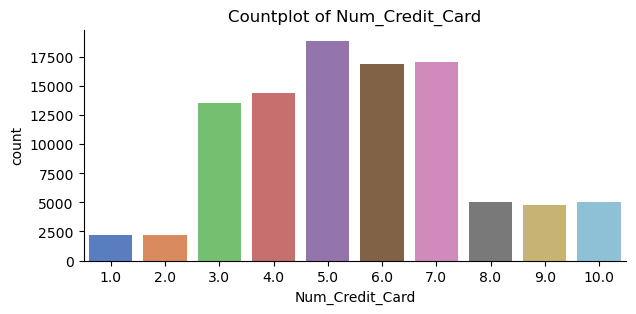

In [74]:
sns.countplot(x=df['Num_Credit_Card'], palette='muted')

plt.title('Countplot of Num_Credit_Card')
sns.despine()

* Now we don't have any rare labels. We have enough frequency for each category.
* We can use this variable now for further analysis

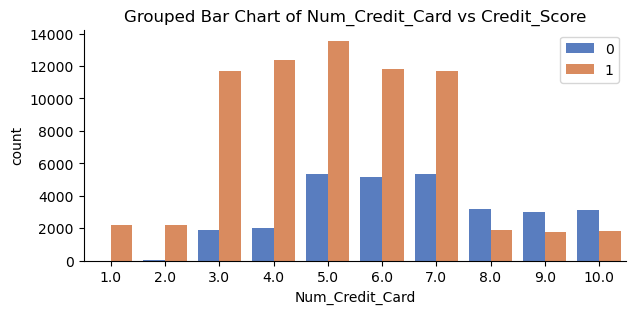

In [75]:
cat_variable_plot(df, 'Num_Credit_Card', 'Credit_Score')

* We don't have similar ratio across all the categories.
* It implies, this variable has a relationship with target variable.
* We will check the relationship by using statistical test i.e. Chi-square test

In [76]:
chi2_test(df, 'Num_Credit_Card', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=13090.322371255186, pvalue=0.0, dof=9, expected_freq=array([[  637.66602,  1561.33398],
       [  636.79608,  1559.20392],
       [ 3932.1288 ,  9627.8712 ],
       [ 4164.69276, 10197.30724],
       [ 5481.49194, 13421.50806],
       [ 4909.94136, 12022.05864],
       [ 4936.61952, 12087.38048],
       [ 1471.06854,  3601.93146],
       [ 1378.27494,  3374.72506],
       [ 1449.32004,  3548.67996]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Num_Credit_Card and Credit_Score


* We are selecting `Num_Credit_Card` variable

In [77]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype('category')

### Interest_Rate

In [78]:
df['Interest_Rate'].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

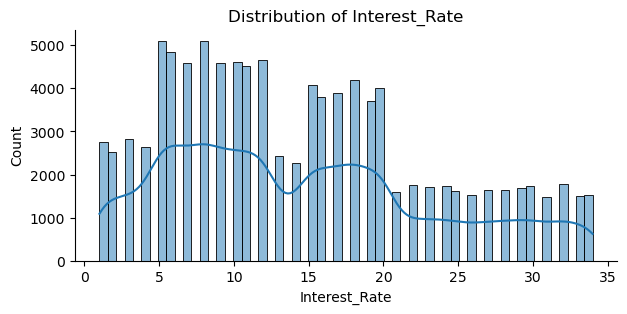

In [79]:
sns.histplot(df['Interest_Rate'], kde=True)

plt.title('Distribution of Interest_Rate')
sns.despine()

* Data is almost normally distributed. We don't need to do any kind of transformations
* We can use this variable for further analysis.

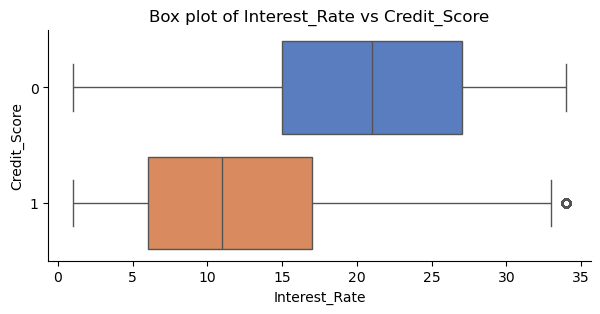

In [80]:
num_variable_plot(df, 'Interest_Rate', 'Credit_Score')

* By looking at the box plot we can say, this variable has quite strong relationship with the target variable.
* The data distribution of both the categories are different.
* Now we will check the correlation by using statistical test i.e. ANOVA Test

In [81]:
anova_test(df, 'Interest_Rate', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=20616.622063562514, pvalue=0.0) 

F-statistics = 20616.622063562514 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Interest_Rate and Credit_Score


* We can select `Interest_Rate` variable

### Num_of_Loan

In [82]:
df['Num_of_Loan'].value_counts()

Num_of_Loan
3.0    15752
2.0    15712
4.0    15456
0.0    11408
1.0    11128
6.0     8144
7.0     7680
5.0     7528
9.0     3856
8.0     3336
Name: count, dtype: int64

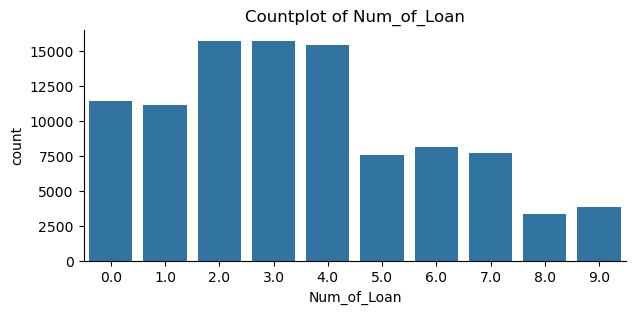

In [83]:
sns.countplot(x=df['Num_of_Loan'])

plt.title('Countplot of Num_of_Loan')
sns.despine()

* We have enough frequency for each category. We don't have any rare label

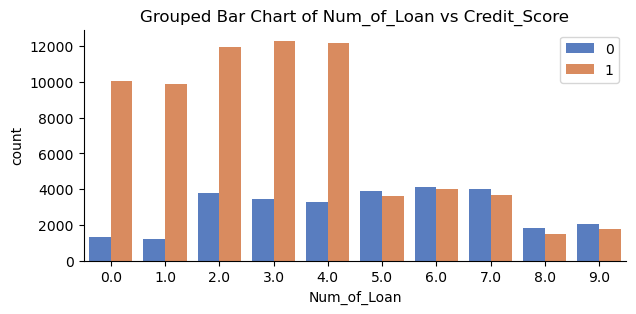

In [84]:
cat_variable_plot(df, 'Num_of_Loan', 'Credit_Score')

* We don't have similar ratio across all the categories.
* We can say that this feature has some relationship with the target variable.
* We can conclude the relationship by using Chi-square test

In [85]:
chi2_test(df, 'Num_of_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=12461.950781385754, pvalue=0.0, dof=9, expected_freq=array([[ 3308.09184,  8099.90816],
       [ 3226.89744,  7901.10256],
       [ 4556.16576, 11155.83424],
       [ 4567.76496, 11184.23504],
       [ 4481.93088, 10974.06912],
       [ 2182.96944,  5345.03056],
       [ 2361.59712,  5782.40288],
       [ 2227.0464 ,  5452.9536 ],
       [  967.37328,  2368.62672],
       [ 1118.16288,  2737.83712]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Num_of_Loan and Credit_Score


* We are selecting `Num_of_Loan` variable

In [86]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('category')

### Type_of_Loan

In [87]:
df['Type_of_Loan'].nunique()

6261

* This variable has very high cardinality.
* We can't use all these categoris for ML model.
* we will extract some valuable information from this variable.
* We can create multiple variable by extracting inforamtion from this variable

In [88]:
df["Type_of_Loan"].str.split(' ', expand=True)[1].unique()

array(['loan,credit-builder', 'loan', 'loan,auto', 'specified', 'Data',
       'loan,mortgage', 'specified,auto', 'loan,debt', 'specified,payday',
       'loan,personal', 'loan,payday', 'specified,student', 'loan,home',
       'loan,not', 'equity', 'consolidation', 'loan,student',
       'specified,personal', 'specified,credit-builder', 'specified,debt',
       'specified,home', 'specified,not', 'specified,mortgage'],
      dtype=object)

* We can extract categries using `split` method

In [89]:
## We will list down the some of the common loan types from this variable

type_of_loan = ['auto loan','personal loan','credit-builder loan','home equity loan','not specified','No Data','mortgage loan',
               'student loan','debt consolidation loan','payday loan']

* Above list consist some of the common loan types.
* We will create one column for each loan type and we give binary value as observations

In [90]:
df['Type_of_Loan'].apply(lambda x:1 if 'auto loan' in x else 0).value_counts()

Type_of_Loan
0    69440
1    30560
Name: count, dtype: int64

In [91]:
df['Type_of_Loan'].apply(lambda x:1 if 'personal loan' in x else 0).value_counts()

Type_of_Loan
0    68896
1    31104
Name: count, dtype: int64

In [92]:
df['Auto_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'auto loan' in x else 'No')
df['Personal_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'personal loan' in x else 'No')
df['Credit-builder_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'credit-builder loan' in x else 'No')
df['Home_Equity_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'home equity loan' in x else 'No')
df['Mortgage_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'mortgage loan' in x else 'No')
df['Student_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'student loan' in x else 'No')
df['Debt_Consolidation_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'debt consolidation loan' in x else 'No')
df['Payday_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'payday loan' in x else 'No')
df['Not_Specified_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'not specified' in x else 'No')
df['No_Data_of_Loan'] = df['Type_of_Loan'].apply(lambda x:'Yes' if 'No Data' in x else 'No')

df.head(1)

,Month,Age,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Log_Annual_Income,Log_Monthly_Inhand_Salary,Auto_Loan,Personal_Loan,Credit-builder_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Not_Specified_Loan,No_Data_of_Loan
0,1,23.0,Scientist,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,1,9.858183,7.509249,Yes,Yes,Yes,Yes,No,No,No,No,No,No


* Now we can drop original column i.e. `Type_of_Loan`

In [93]:
df.drop('Type_of_Loan', axis=1, inplace=True)

df.head(1)

,Month,Age,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Log_Annual_Income,Log_Monthly_Inhand_Salary,Auto_Loan,Personal_Loan,Credit-builder_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Not_Specified_Loan,No_Data_of_Loan
0,1,23.0,Scientist,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,1,9.858183,7.509249,Yes,Yes,Yes,Yes,No,No,No,No,No,No


* Now we will analyse all newly created variables

### Auto_Loan

In [94]:
df['Auto_Loan'].value_counts()

Auto_Loan
No     69440
Yes    30560
Name: count, dtype: int64

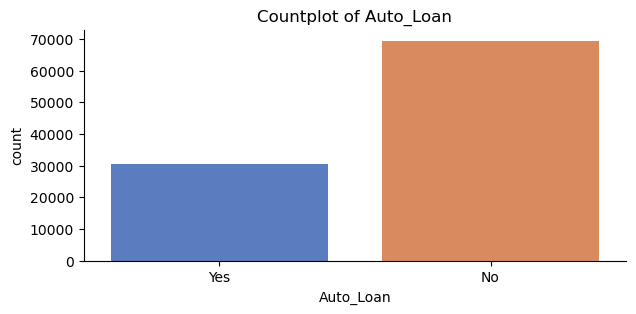

In [95]:
sns.countplot(x=df["Auto_Loan"], palette='muted')

plt.title('Countplot of Auto_Loan')
sns.despine()

* We have enough frequency for each category, therefore, we can use this variable for further analysis

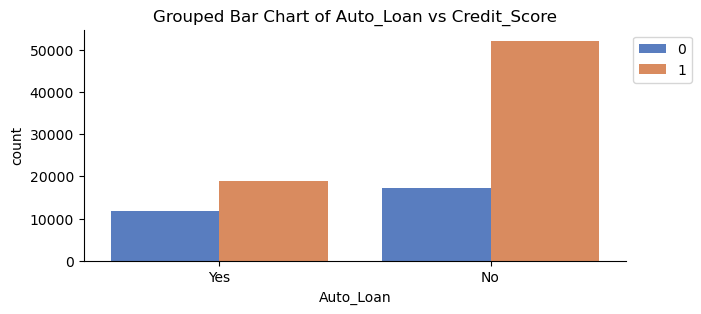

In [96]:
cat_variable_plot(df, 'Auto_Loan', 'Credit_Score')

* Ratio of both the categories are looking a little bit same.
* We will confirm relationship after performing Chi-square test

In [97]:
chi2_test(df, 'Auto_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1822.3149336419788, pvalue=0.0, dof=1, expected_freq=array([[20136.2112, 49303.7888],
       [ 8861.7888, 21698.2112]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Auto_Loan and Credit_Score


* We can select `Auto_Loan` variable because it has strong association with `Credit_Score` variable

In [98]:
df['Auto_Loan'] = df['Auto_Loan'].astype('category')

### Personal_Loan

In [99]:
df['Personal_Loan'].value_counts()

Personal_Loan
No     68896
Yes    31104
Name: count, dtype: int64

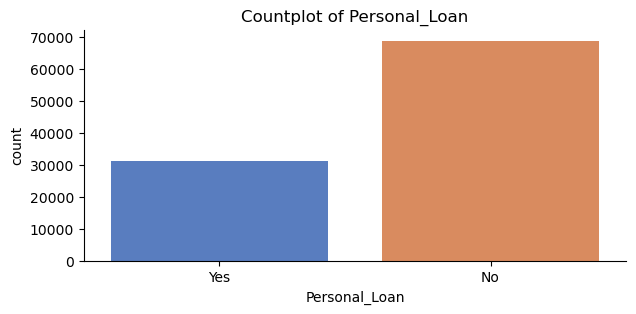

In [100]:
sns.countplot(x=df['Personal_Loan'], palette='muted')

plt.title('Countplot of Personal_Loan')
sns.despine()

* We have enough frequency for each category. We can select this variable for further analysis

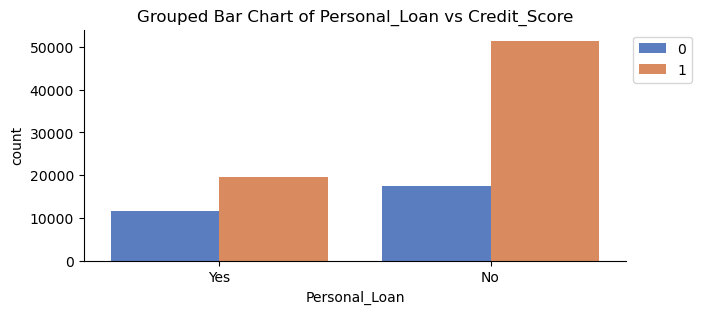

In [101]:
cat_variable_plot(df, 'Personal_Loan', 'Credit_Score')

* By observing above grouped bar plot we can say, there is a difference between the ratio of each category.
* We can fianlise relationship of these two categorical variables by using chi-square test

In [102]:
chi2_test(df, 'Personal_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1464.4995958056795, pvalue=0.0, dof=1, expected_freq=array([[19978.46208, 48917.53792],
       [ 9019.53792, 22084.46208]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Personal_Loan and Credit_Score


* We have enough evidence to reject the Null Hypothesis.
* We are selecting `Personal_Loan` variable for modeling

In [103]:
df['Personal_Loan'] = df['Personal_Loan'].astype('category')

### Credit-builder_Loan

In [104]:
df['Credit-builder_Loan'].value_counts()

Credit-builder_Loan
No     68272
Yes    31728
Name: count, dtype: int64

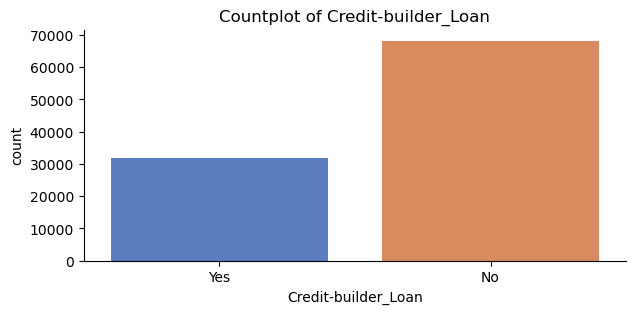

In [105]:
sns.countplot(x=df['Credit-builder_Loan'], palette='muted')

plt.title('Countplot of Credit-builder_Loan')
sns.despine()

* We have enough frequency for each category

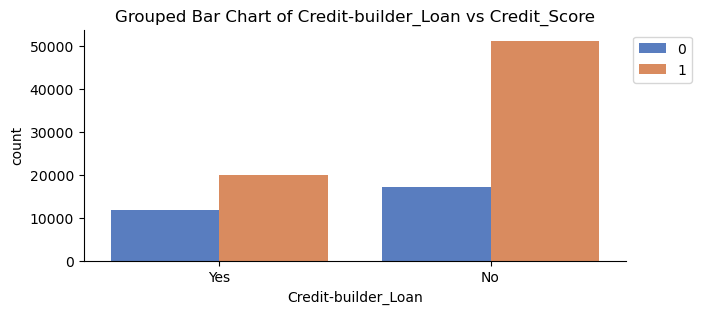

In [106]:
cat_variable_plot(df, 'Credit-builder_Loan', 'Credit_Score')

* The ratio between two variables is different.
* We will use chi-square test to confirm the relationship with target variable

In [107]:
chi2_test(df, 'Credit-builder_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1600.8612433402168, pvalue=0.0, dof=1, expected_freq=array([[19797.51456, 48474.48544],
       [ 9200.48544, 22527.51456]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Credit-builder_Loan and Credit_Score


* We can select `Credit-builder_Loan` variable for modeling

In [108]:
df['Credit-builder_Loan'] = df['Credit-builder_Loan'].astype('category')

### Home_Equity_Loan

In [109]:
df['Home_Equity_Loan'].value_counts()

Home_Equity_Loan
No     68600
Yes    31400
Name: count, dtype: int64

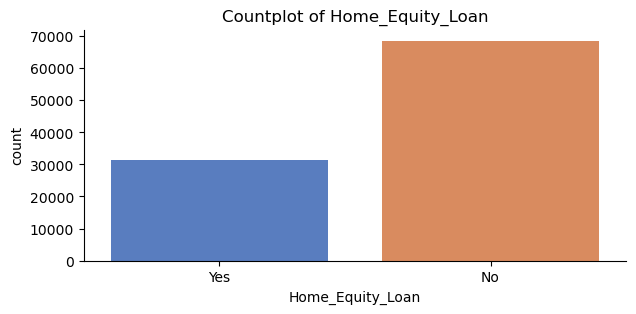

In [110]:
sns.countplot(x=df['Home_Equity_Loan'], palette='muted')

plt.title('Countplot of Home_Equity_Loan')
sns.despine()

* We have enough frequeny for each category for this variable

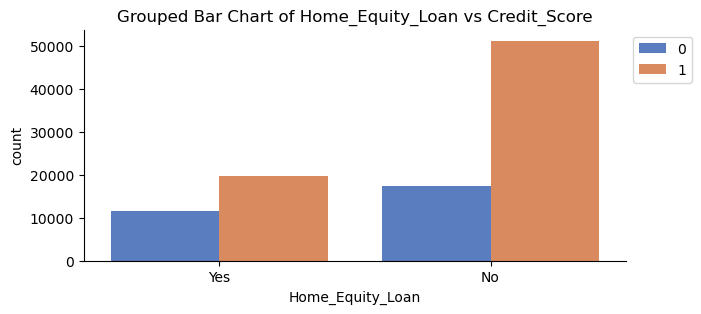

In [111]:
cat_variable_plot(df, 'Home_Equity_Loan', 'Credit_Score')

* The ratio is a little bit different for each category.
* There would be relationship between two variables.
* We will confirm the relationship by using chi-square test

In [112]:
chi2_test(df, 'Home_Equity_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1449.1301506200205, pvalue=0.0, dof=1, expected_freq=array([[19892.628, 48707.372],
       [ 9105.372, 22294.628]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Home_Equity_Loan and Credit_Score


* We can use `Home_Equity_Loan` variable for modeling

In [113]:
df['Home_Equity_Loan'] = df['Home_Equity_Loan'].astype('category')

### Mortgage_Loan

In [114]:
df['Mortgage_Loan'].value_counts()

Mortgage_Loan
No     68640
Yes    31360
Name: count, dtype: int64

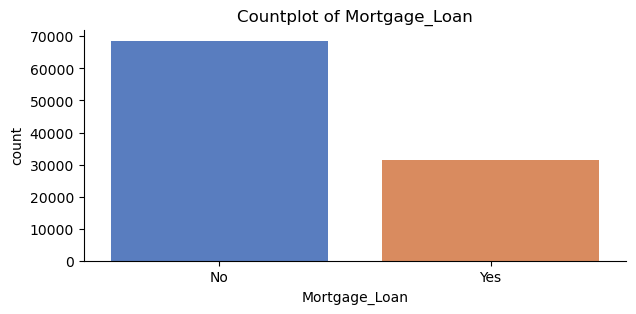

In [115]:
sns.countplot(x=df['Mortgage_Loan'], palette='muted')

plt.title('Countplot of Mortgage_Loan')
sns.despine()

* We have a enough frequency for each category

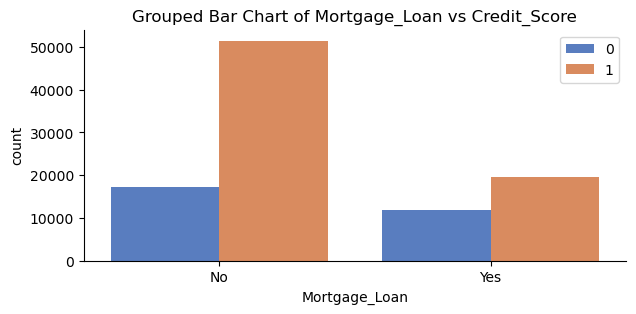

In [116]:
cat_variable_plot(df, 'Mortgage_Loan', 'Credit_Score')

* The ratio is a little bit different for each category.
* There would be relationship between two variables.

In [117]:
chi2_test(df, 'Mortgage_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1649.4295990291398, pvalue=0.0, dof=1, expected_freq=array([[19904.2272, 48735.7728],
       [ 9093.7728, 22266.2272]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Mortgage_Loan and Credit_Score


* We can use `Mortgage_Loan` variable for modeling.

In [118]:
df['Mortgage_Loan'] = df['Mortgage_Loan'].astype('category')

### Student_Loan

In [119]:
df['Student_Loan'].value_counts()

Student_Loan
No     68960
Yes    31040
Name: count, dtype: int64

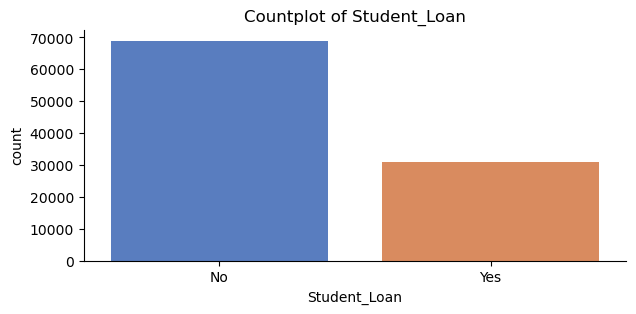

In [120]:
sns.countplot(x=df['Student_Loan'], palette='muted')

plt.title('Countplot of Student_Loan')
sns.despine()

* We have a enough frequency for each category.

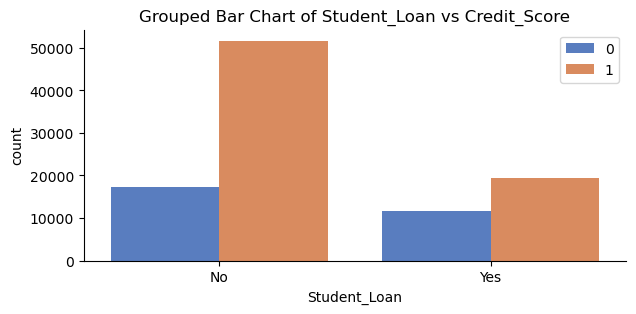

In [121]:
cat_variable_plot(df, 'Student_Loan', 'Credit_Score')

* The ratio is a little bit different for each category.
* There would be relationship between two variables.

In [122]:
chi2_test(df, 'Student_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1660.902585440819, pvalue=0.0, dof=1, expected_freq=array([[19997.0208, 48962.9792],
       [ 9000.9792, 22039.0208]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Student_Loan and Credit_Score


* We can use `Student_Loan` variable for modeling.

In [123]:
df['Student_Loan'] = df['Student_Loan'].astype('category')

### Debt_Consolidation_Loan

In [124]:
df['Debt_Consolidation_Loan'].value_counts()

Debt_Consolidation_Loan
No     68960
Yes    31040
Name: count, dtype: int64

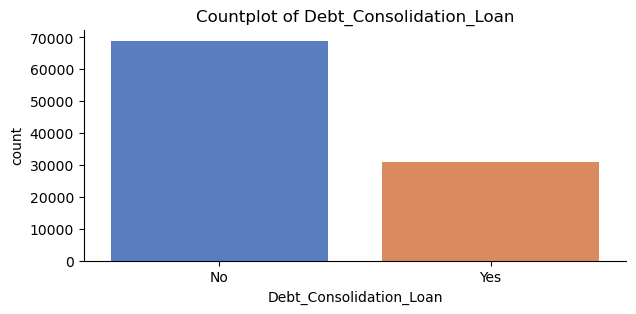

In [125]:
sns.countplot(x=df['Debt_Consolidation_Loan'], palette='muted')

plt.title('Countplot of Debt_Consolidation_Loan')
sns.despine()

* We have enough frequency for each category, therefore, we can use this variable for further analysis.

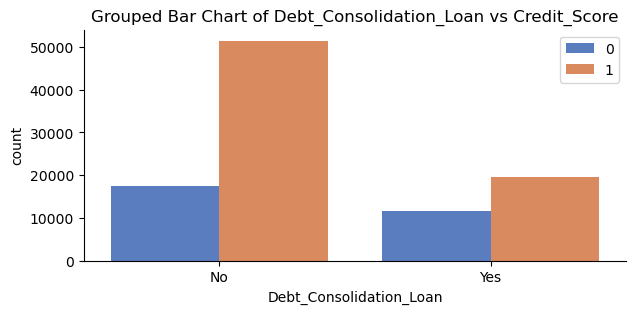

In [126]:
cat_variable_plot(df, 'Debt_Consolidation_Loan', 'Credit_Score')

* The ratio of both categories is different, therefore, we can say there is a relationship between two variables
* We will confirm the relationship by using statistical tests i.e. Chi-square test

In [127]:
chi2_test(df, 'Debt_Consolidation_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1467.9558494806784, pvalue=0.0, dof=1, expected_freq=array([[19997.0208, 48962.9792],
       [ 9000.9792, 22039.0208]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Debt_Consolidation_Loan and Credit_Score


* We will select `Debt_Consolidation_Loan` variable for modeling

In [128]:
df['Debt_Consolidation_Loan'] = df['Debt_Consolidation_Loan'].astype('category')

### Payday_Loan

In [129]:
df['Payday_Loan'].value_counts()

Payday_Loan
No     68056
Yes    31944
Name: count, dtype: int64

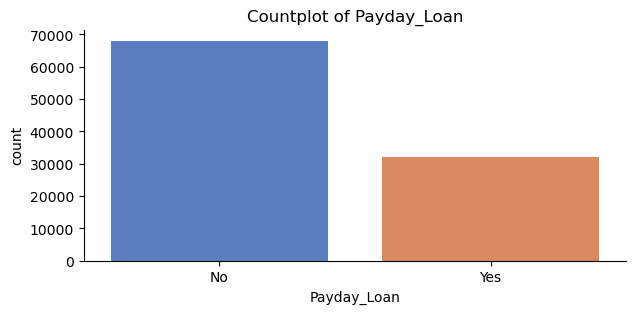

In [130]:
sns.countplot(x=df['Payday_Loan'], palette='muted')

plt.title('Countplot of Payday_Loan')
sns.despine()

* We have enough frequency for each category

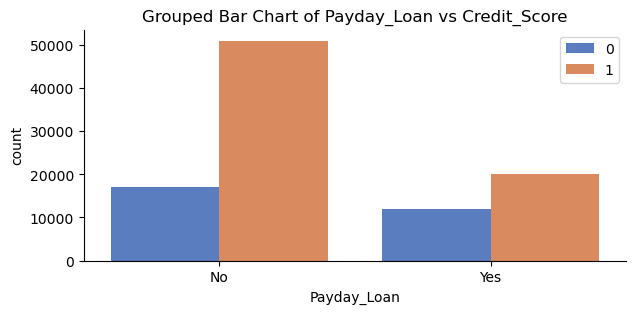

In [131]:
cat_variable_plot(df, 'Payday_Loan', 'Credit_Score')

* The ratio is not similar across the category.
* We will use chi-square test to check relationship with target variable.

In [132]:
chi2_test(df, 'Payday_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1599.1022854351759, pvalue=0.0, dof=1, expected_freq=array([[19734.87888, 48321.12112],
       [ 9263.12112, 22680.87888]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Payday_Loan and Credit_Score


* We will select this `Payday_Loan` for modeling

In [133]:
df['Payday_Loan'] = df['Payday_Loan'].astype('category')

### Not_Specified_Loan

In [134]:
df['Not_Specified_Loan'].value_counts()

Not_Specified_Loan
No     68320
Yes    31680
Name: count, dtype: int64

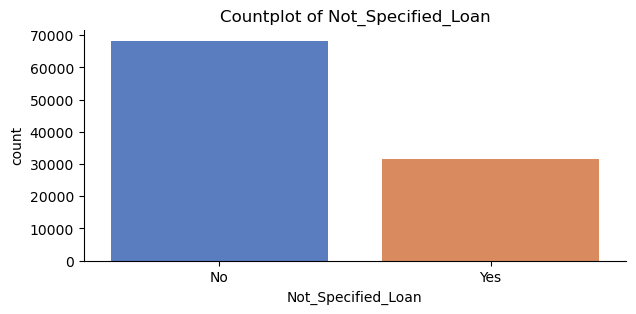

In [135]:
sns.countplot(x=df['Not_Specified_Loan'], palette='muted')

plt.title('Countplot of Not_Specified_Loan')
sns.despine()

* We have good number of frequency for each category.

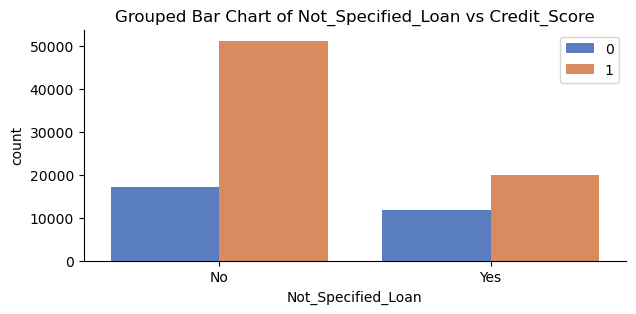

In [136]:
cat_variable_plot(df, 'Not_Specified_Loan', 'Credit_Score')

* We have different ratio for both the categories.

In [137]:
chi2_test(df, 'Not_Specified_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1604.4625282026418, pvalue=0.0, dof=1, expected_freq=array([[19811.4336, 48508.5664],
       [ 9186.5664, 22493.4336]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Not_Specified_Loan and Credit_Score


* We can choose `Not_Specified_Loan` variable for modeling.

In [138]:
df['Not_Specified_Loan'] = df['Not_Specified_Loan'].astype('category')

### No_Data_of_Loan

In [139]:
df['No_Data_of_Loan'].value_counts()

No_Data_of_Loan
No     88592
Yes    11408
Name: count, dtype: int64

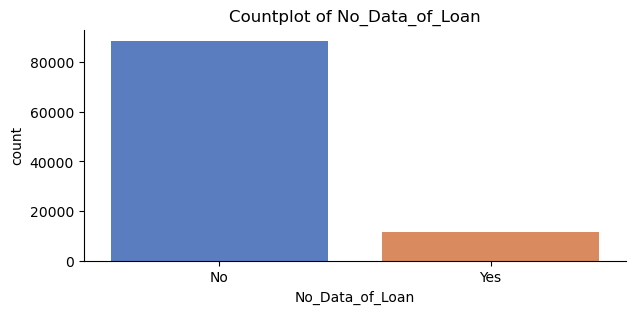

In [140]:
sns.countplot(x=df['No_Data_of_Loan'], palette='muted')

plt.title('Countplot of No_Data_of_Loan')
sns.despine()

* For category 1 we have fewer count but this is acceptable.

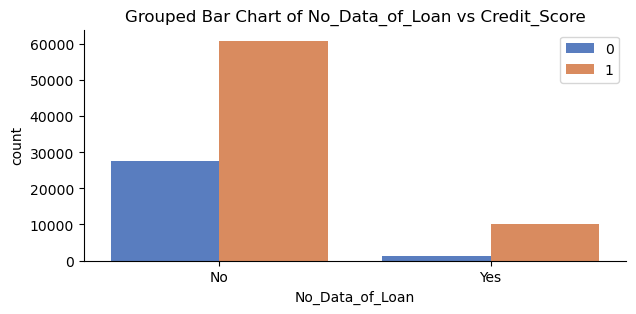

In [141]:
cat_variable_plot(df, 'No_Data_of_Loan', 'Credit_Score')

* The ratio is different for both the categories.

In [142]:
chi2_test(df, 'No_Data_of_Loan', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1868.062393727741, pvalue=0.0, dof=1, expected_freq=array([[25689.90816, 62902.09184],
       [ 3308.09184,  8099.90816]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between No_Data_of_Loan and Credit_Score


* We can select `No_Data_of_Loan` variable for modeling. 

In [143]:
df['No_Data_of_Loan'] = df['No_Data_of_Loan'].astype('category')

### Delay_from_due_date

In [144]:
df['Delay_from_due_date'].nunique()

63

* This variable has a more than 20 categories so we will consider it as a continuous variable.

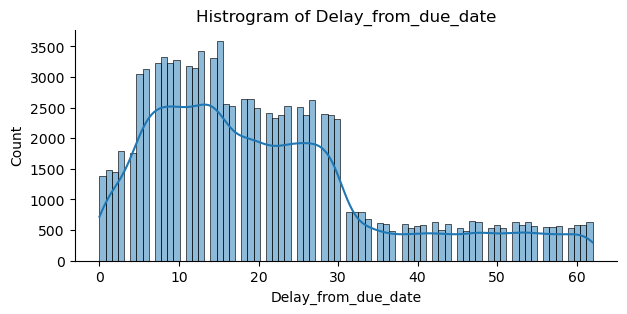

In [145]:
sns.histplot(df['Delay_from_due_date'], kde=True)

plt.title('Histrogram of Delay_from_due_date')
sns.despine()

* Data is not exactly normally distributed but we can use this for modeling.
* We don't have outliers.

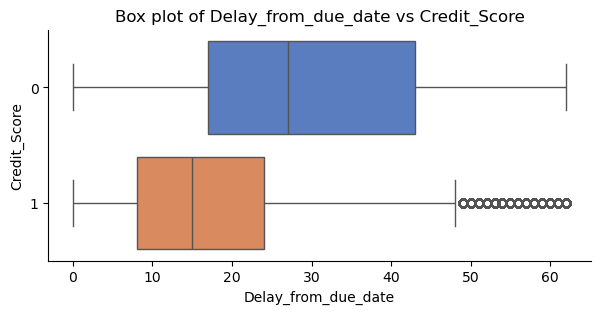

In [146]:
num_variable_plot(df, 'Delay_from_due_date', 'Credit_Score')

* Data distribution of each category is different, hence, we can say it has significan correlation with target variable.
* We will confirm the relationship by using statistical test i.e. ANOVA test.

In [147]:
anova_test(df, 'Delay_from_due_date','Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=16189.836042629675, pvalue=0.0) 

F-statistics = 16189.836042629675 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Delay_from_due_date and Credit_Score


* We have very high F-statistic value and very low p_value.
* The `Delay_from_due_date` variable has very strong correlation with the `Credit_Score`

### Num_of_Delayed_Payment

In [148]:
df['Num_of_Delayed_Payment'].nunique()

26

* We have more than 20 categories for this variable so we cansider this variable as descrete numberical. 

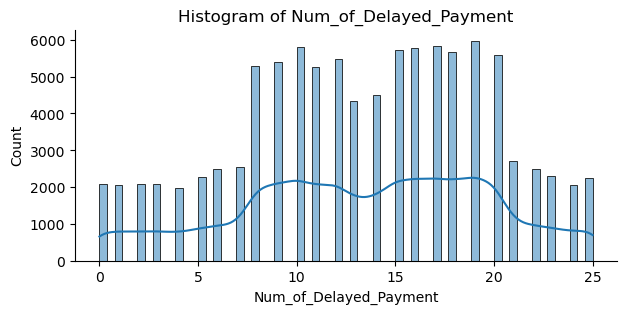

In [149]:
sns.histplot(df['Num_of_Delayed_Payment'], kde=True)

plt.title('Histogram of Num_of_Delayed_Payment')
sns.despine()

* Data is not exactly normally distributed but we can use this for modeling.
* We don't have outliers.

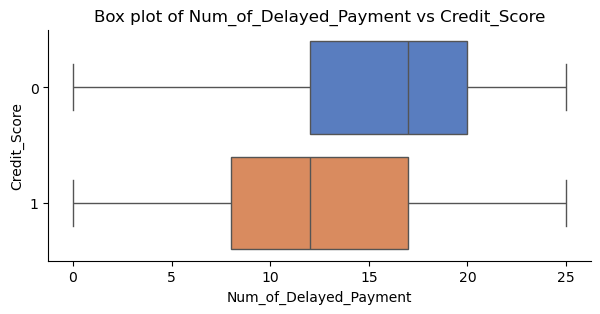

In [150]:
num_variable_plot(df, 'Num_of_Delayed_Payment', 'Credit_Score')

* Data distribution of each category is different, hence, we can say it has significan correlation with target variable.
* We will confirm the relationship by using statistical test i.e. ANOVA test.

In [151]:
anova_test(df, 'Num_of_Delayed_Payment', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=7002.752334047033, pvalue=0.0) 

F-statistics = 7002.752334047033 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Num_of_Delayed_Payment and Credit_Score


* We can select `Num_of_Delayed_Payment` variable for modeling.

### Changed_Credit_Limit

In [152]:
df['Changed_Credit_Limit'].nunique()

3452

In [153]:
df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.470323
std           6.609481
min           0.500000
25%           5.380000
50%           9.400000
75%          14.850000
max          29.980000
Name: Changed_Credit_Limit, dtype: float64

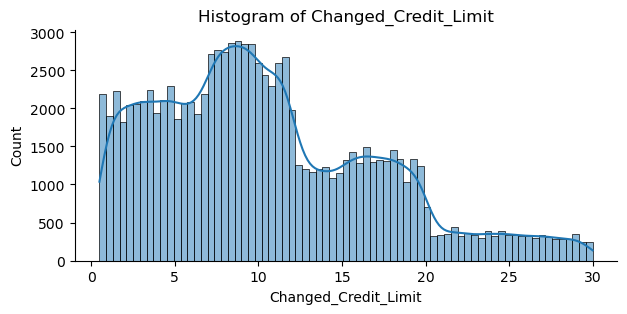

In [154]:
sns.histplot(df['Changed_Credit_Limit'], kde=True)

plt.title('Histogram of Changed_Credit_Limit')
sns.despine()

* Data is a little bit rightly skewed but we can use it for modeling. We don't need to do any transformation.

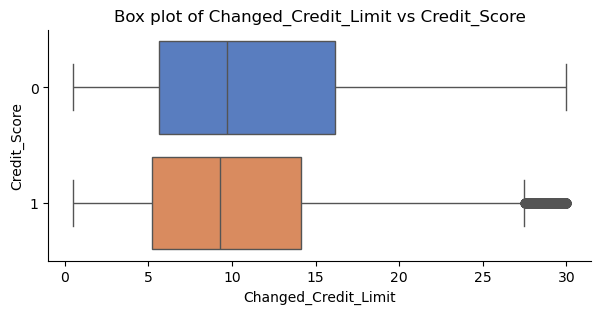

In [155]:
num_variable_plot(df, 'Changed_Credit_Limit', 'Credit_Score')

* There is a little difference between median value of both the categories. 
* Both the box plots are not identical, hecne, there would be some kind of relationship with target variable.

In [156]:
anova_test(df, 'Changed_Credit_Limit', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=391.61916186027645, pvalue=5.399054307109696e-87) 

F-statistics = 391.61916186027645 

* P_value = 5.399054307109696e-87. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Changed_Credit_Limit and Credit_Score


* We can use `Changed_Credit_Limit` variable for modeling.

### Num_Credit_Inquiries

In [157]:
df['Num_Credit_Inquiries'].nunique()

18

In [158]:
df['Num_Credit_Inquiries'].describe()

count    100000.000000
mean          5.798250
std           3.867826
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

* We have enough frequency for each category.

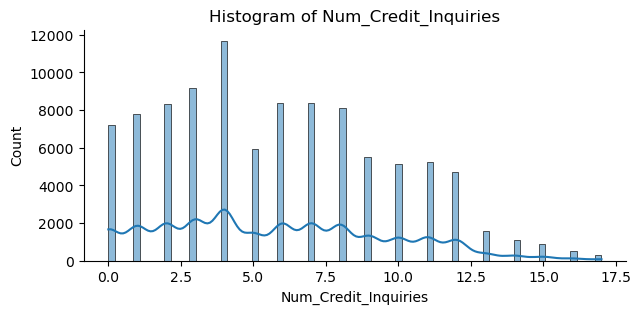

In [159]:
sns.histplot(df['Num_Credit_Inquiries'], kde=True)

plt.title('Histogram of Num_Credit_Inquiries')
sns.despine()

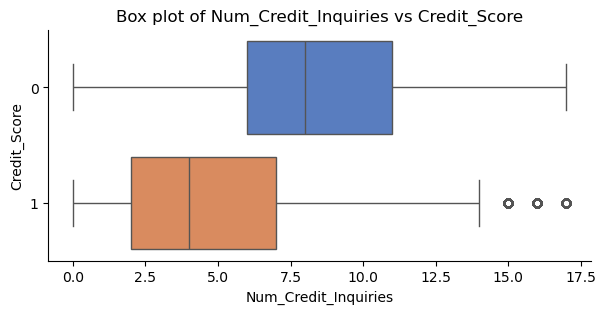

In [160]:
num_variable_plot(df, 'Num_Credit_Inquiries', 'Credit_Score')

In [161]:
anova_test(df, 'Num_Credit_Inquiries', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=18316.970145494648, pvalue=0.0) 

F-statistics = 18316.970145494648 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Num_Credit_Inquiries and Credit_Score


### Credit_Mix

In [162]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

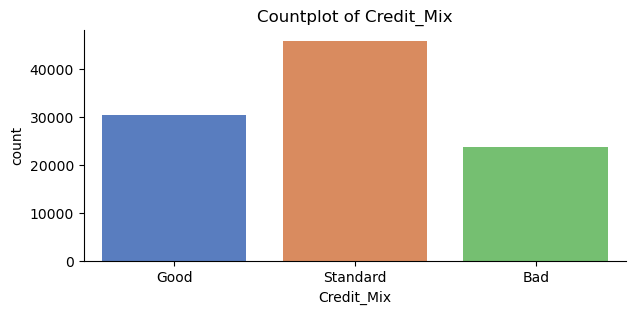

In [163]:
sns.countplot(x=df['Credit_Mix'], palette='muted')

plt.title('Countplot of Credit_Mix')
sns.despine()

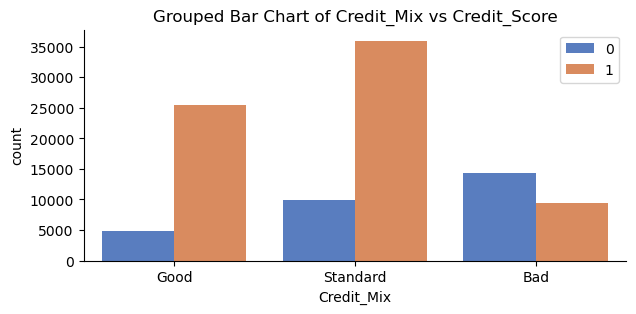

In [164]:
cat_variable_plot(df, 'Credit_Mix', 'Credit_Score')

* The ratio is different across all the categories.

In [165]:
chi2_test(df, 'Credit_Mix', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=14938.068486990354, pvalue=0.0, dof=2, expected_freq=array([[ 6892.24464, 16875.75536],
       [ 8810.75232, 21573.24768],
       [13295.00304, 32552.99696]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Credit_Mix and Credit_Score


* We can select `Credit_Mix` variable for modeling.

### Outstanding_Debt

In [166]:
df['Outstanding_Debt'].nunique()

12203

In [167]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

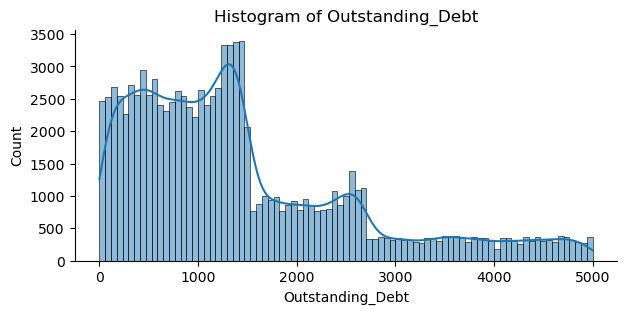

In [168]:
sns.histplot(df['Outstanding_Debt'], kde=True)

plt.title('Histogram of Outstanding_Debt')
sns.despine()

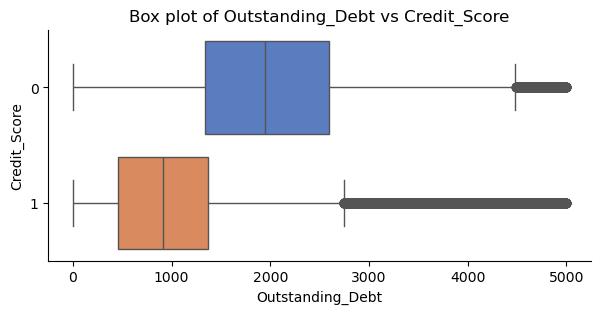

In [169]:
num_variable_plot(df, 'Outstanding_Debt', 'Credit_Score')

* There are some outliers but this acceptable because the outliers is not extreme values here.
* Data distribution is also looking different for both category.

In [170]:
anova_test(df, 'Outstanding_Debt', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=15130.023690354568, pvalue=0.0) 

F-statistics = 15130.023690354568 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Outstanding_Debt and Credit_Score


* We will select `Outstanding_Debt` variable for modeling

### Credit_Utilization_Ratio

In [171]:
df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

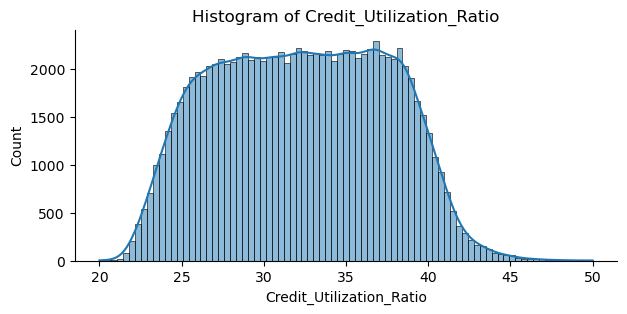

In [172]:
sns.histplot(df['Credit_Utilization_Ratio'], kde=True)

plt.title('Histogram of Credit_Utilization_Ratio')
sns.despine()

* Data is normally distributed

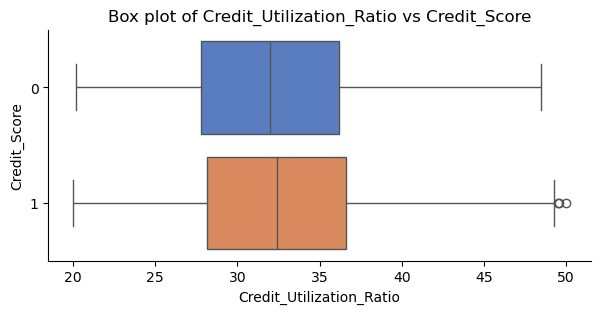

In [173]:
num_variable_plot(df, 'Credit_Utilization_Ratio', 'Credit_Score')

* The distribution of data is quite similar for both the categories. 
* There is a little bit of difference in median value.

In [174]:
anova_test(df, 'Credit_Utilization_Ratio', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=139.67154225640158, pvalue=3.29992384710096e-32) 

F-statistics = 139.67154225640158 

* P_value = 3.29992384710096e-32. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Credit_Utilization_Ratio and Credit_Score


* We will select `Credit_Utilization_Ratio` variable for modeling.

### Credit_History_Age

In [175]:
df['Credit_History_Age'].describe()

count    100000.000000
mean        221.220460
std          99.680716
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

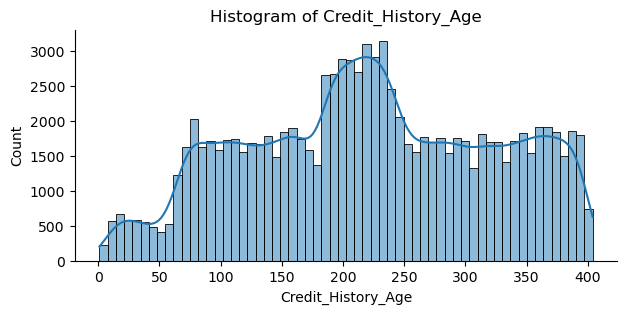

In [176]:
sns.histplot(df['Credit_History_Age'], kde=True)

plt.title('Histogram of Credit_History_Age')
sns.despine()

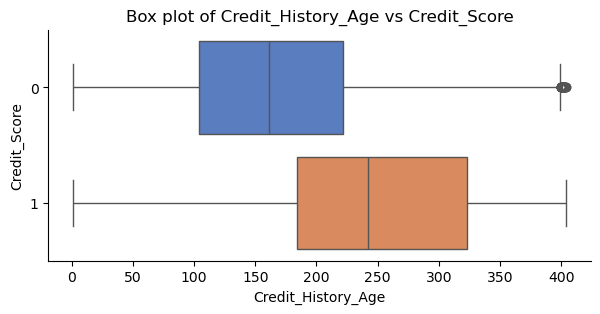

In [177]:
num_variable_plot(df, 'Credit_History_Age', 'Credit_Score')

* The data distribution of each category is different.

In [178]:
anova_test(df, 'Credit_History_Age', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=12054.195907248202, pvalue=0.0) 

F-statistics = 12054.195907248202 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Credit_History_Age and Credit_Score


* `Credit_History_Age` is a good predictor for modeling.

### Payment_of_Min_Amount

In [179]:
df['Payment_of_Min_Amount'].nunique()

3

In [180]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

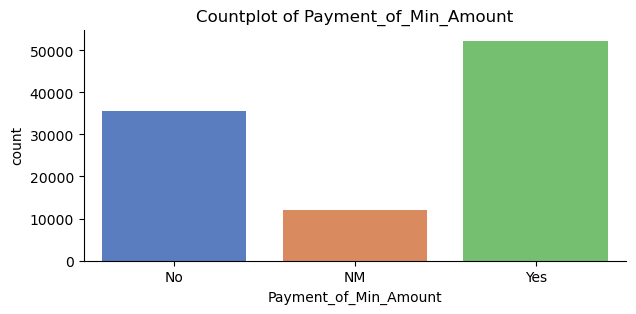

In [181]:
sns.countplot(x=df['Payment_of_Min_Amount'], palette='muted')

plt.title('Countplot of Payment_of_Min_Amount')
sns.despine()

* We have enough frequency for each category.

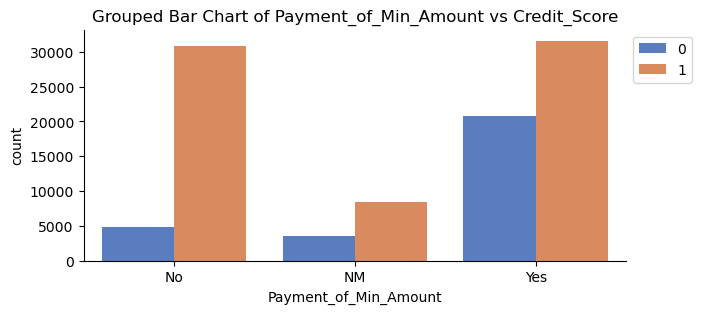

In [182]:
cat_variable_plot(df, 'Payment_of_Min_Amount', 'Credit_Score')

* The ratio is different for across all the categories.

In [183]:
chi2_test(df, 'Payment_of_Min_Amount', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=7069.570375240696, pvalue=0.0, dof=2, expected_freq=array([[ 3481.78986,  8525.21014],
       [10342.71666, 25324.28334],
       [15173.49348, 37152.50652]])) 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Payment_of_Min_Amount and Credit_Score


* `Payment_of_Min_Amount` variable is useful for modeling.

### Total_EMI_per_month

In [184]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean        107.699208
std         132.267056
min           0.000000
25%          29.268886
50%          66.462304
75%         147.392573
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

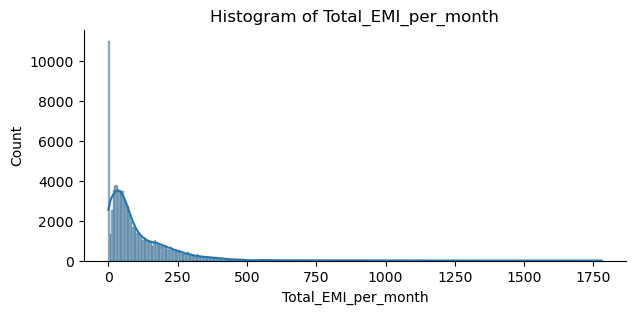

In [185]:
sns.histplot(df['Total_EMI_per_month'], kde=True)

plt.title('Histogram of Total_EMI_per_month')
sns.despine()

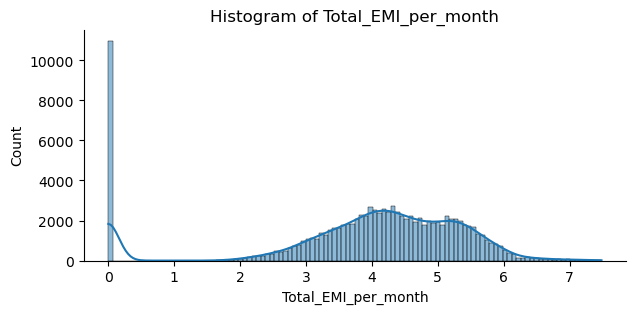

In [186]:
sns.histplot(np.log(df['Total_EMI_per_month'] + 1), kde=True)

plt.title('Histogram of Total_EMI_per_month')
sns.despine()

* We use log transformation for only positive values so we are adding constant to convert 0's into 1.
* After applying transformations, we can see data is normally distributed.
* Before checking the relationship with target variable, we will create new variable for transfomed data.

In [187]:
df['Log_Total_EMI_per_month'] = np.log(df['Total_EMI_per_month'] + 1)

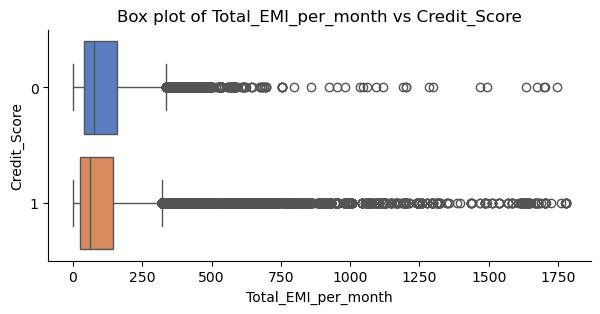

In [188]:
num_variable_plot(df, 'Total_EMI_per_month', 'Credit_Score')

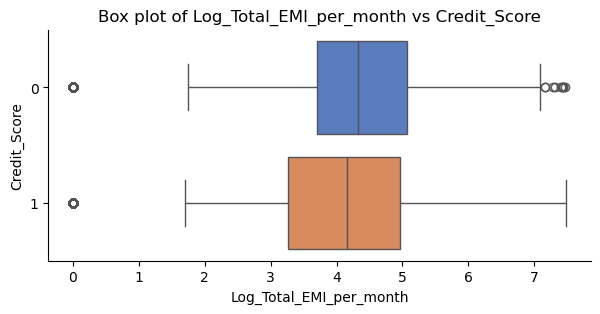

In [189]:
num_variable_plot(df, 'Log_Total_EMI_per_month', 'Credit_Score')

* By looking at the box plot, we can say there are no outliers for transformes variable and this variable is normally distributed than the original variable.
* Now Onward, we are using this transformed varaible.

In [190]:
anova_test(df, 'Log_Total_EMI_per_month', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=1505.7359335303506, pvalue=0.0) 

F-statistics = 1505.7359335303506 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Log_Total_EMI_per_month and Credit_Score


* We are going to use `Log_Total_EMI_per_month` variable for modeling.

In [191]:
df.drop('Total_EMI_per_month', axis=1, inplace=True)

### Amount_invested_monthly

In [192]:
df['Amount_invested_monthly'].describe()

count    100000.000000
mean         55.101315
std          39.006932
min           0.000000
25%          27.959111
50%          45.156550
75%          71.295797
max         434.191089
Name: Amount_invested_monthly, dtype: float64

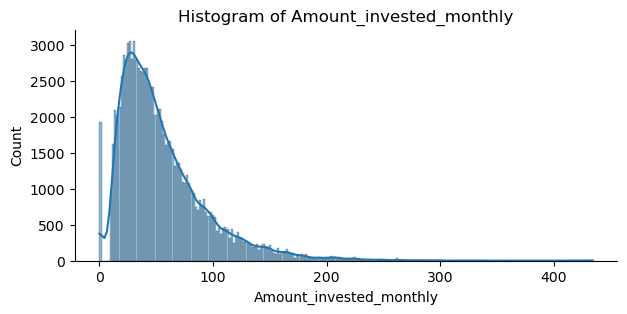

In [193]:
sns.histplot(df['Amount_invested_monthly'], kde=True)

plt.title('Histogram of Amount_invested_monthly')
sns.despine()

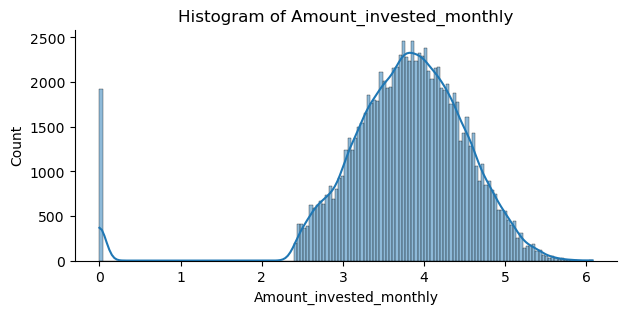

In [194]:
sns.histplot(np.log(df['Amount_invested_monthly']+1), kde=True)

plt.title('Histogram of Amount_invested_monthly')
sns.despine()

* We use log transformation for only positive values so we are adding constant to convert 0's into 1.
* After applying transformations, we can see data is normally distributed.
* Before checking the relationship with target variable, we will create new variable for transfomed data.

In [195]:
df['Log_Amount_invested_monthly'] = np.log(df['Amount_invested_monthly']+1)

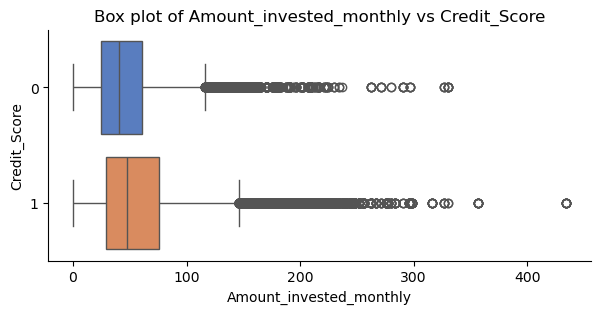

In [196]:
num_variable_plot(df, 'Amount_invested_monthly', 'Credit_Score')

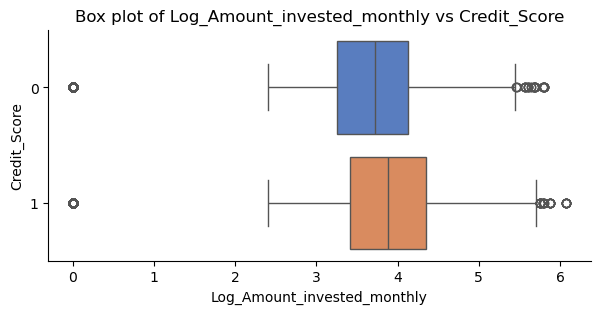

In [197]:
num_variable_plot(df, 'Log_Amount_invested_monthly', 'Credit_Score')

* There are some outlier but we will ignore that for now because there are lots of 0 values.
* If we get lower accurecy for ML models then we will back here and treat the outliers.
* The data distribution for both the categories is a little bit different.

In [198]:
anova_test(df, 'Log_Amount_invested_monthly', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=1807.6233496109414, pvalue=0.0) 

F-statistics = 1807.6233496109414 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Log_Amount_invested_monthly and Credit_Score


* We will keep `Log_Amount_invested_monthly` variable for modeling.

In [199]:
df.drop('Amount_invested_monthly', axis=1, inplace=True)

### Payment_Behaviour

In [200]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28585
High_spent_Medium_value_payments    18851
High_spent_Large_value_payments     14778
Low_spent_Medium_value_payments     14634
High_spent_Small_value_payments     12105
Low_spent_Large_value_payments      11047
Name: count, dtype: int64

* We have enough frequency across all categories.

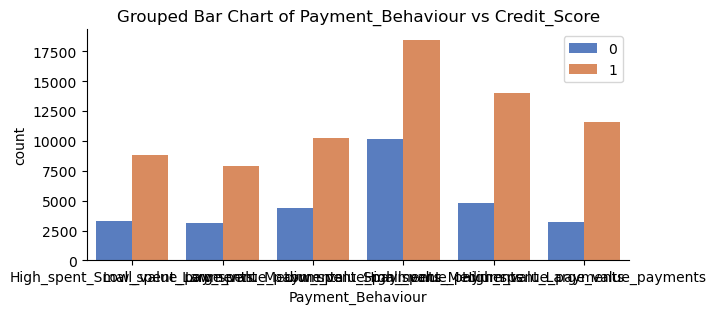

In [201]:
cat_variable_plot(df, 'Payment_Behaviour', 'Credit_Score')

* The ratio is not similar for all the categories.

In [202]:
chi2_test(df, 'Payment_Behaviour', 'Credit_Score')

Chi-square Test: 

* Chi-square test used to check the correlation between two categorical variables. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

Chi-Square Score:
Chi2ContingencyResult(statistic=1139.7834206289144, pvalue=3.238693375409254e-244, dof=5, expected_freq=array([[ 4285.32444, 10492.67556],
       [ 5466.41298, 13384.58702],
       [ 3510.2079 ,  8594.7921 ],
       [ 3203.40906,  7843.59094],
       [ 4243.56732, 10390.43268],
       [ 8289.0783 , 20295.9217 ]])) 

* P_value = 3.238693375409254e-244. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Payment_Behaviour and Credit_Score


* We can keep `Payment_Behaviour` variable for modeling.

### Monthly_Balance

In [203]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        392.697586
std         201.652719
min           0.007760
25%         267.615983
50%         333.865366
75%         463.215683
max        1183.930696
Name: Monthly_Balance, dtype: float64

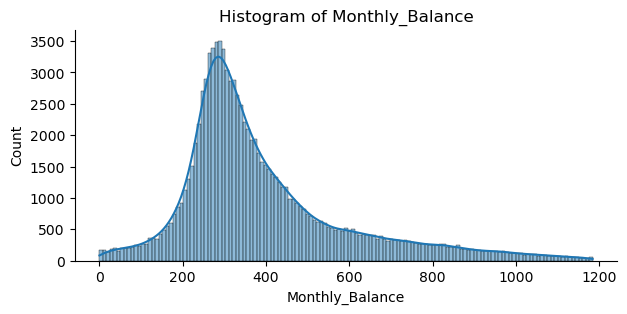

In [204]:
sns.histplot(df['Monthly_Balance'], kde=True)

plt.title('Histogram of Monthly_Balance')
sns.despine()

* Data is normally distributed and we don't see any outliers.

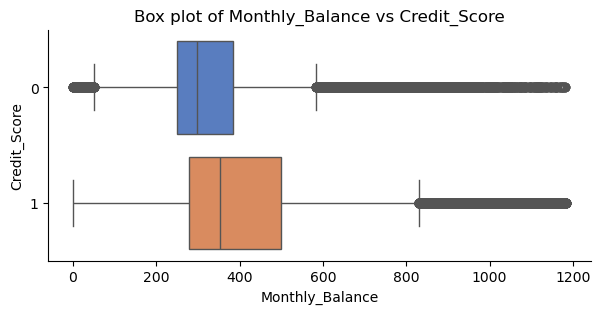

In [205]:
num_variable_plot(df, 'Monthly_Balance', 'Credit_Score')

* There are some outlier but we will ignore that for now because there are lots of 0 values.
* If we get lower accurecy for ML models then we will back here and treat the outliers.
* The data distribution for both the categories is a little bit different.

In [206]:
anova_test(df, 'Monthly_Balance', 'Credit_Score')

ANOVA Test: 

Analysis of variance(ANOVA) is performe to check if there is any relationship between the given categorical and continuous variable. 

        * Null Hypothesis(H0): There is NO relationship between two variables
        * Alternative Hypothesis(H1): There is a significant relationship between two variables 

Here we will try to reject the Null Hypothesis based on p-value 

ANOVA Test Score:
F_onewayResult(statistic=2958.076350591199, pvalue=0.0) 

F-statistics = 2958.076350591199 

* P_value = 0.0. It is a less than 0.05, it means we can reject the Null Hypothesis
* There is a significan relationship between Monthly_Balance and Credit_Score


* We can keep `Monthly_Balance` variable for modeling.

## Final variables we are selecting for modeling.

* All the predictors are useful for modeling except `Month`.
* We will drop `Month` column from the dataset.

In [207]:
df.drop('Month', axis=1, inplace=True)

In [208]:
df.shape

(100000, 32)

In [209]:
df['Credit_Score'] = df['Credit_Score'].astype('int32')

## Create Dummy variables

* Model accept only numberical variable, therefore we are converting categorical variable into numberic

In [210]:
model_data = pd.get_dummies(df)

model_data.shape

(100000, 93)

In [211]:
model_data.head()

,Age,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Credit_Score,Log_Annual_Income,Log_Monthly_Inhand_Salary,Log_Total_EMI_per_month,Log_Amount_invested_monthly,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Num_Bank_Accounts_0.0,Num_Bank_Accounts_1.0,Num_Bank_Accounts_2.0,Num_Bank_Accounts_3.0,Num_Bank_Accounts_4.0,Num_Bank_Accounts_5.0,Num_Bank_Accounts_6.0,Num_Bank_Accounts_7.0,Num_Bank_Accounts_8.0,Num_Bank_Accounts_9.0,Num_Bank_Accounts_10.0,Num_Credit_Card_1.0,Num_Credit_Card_2.0,Num_Credit_Card_3.0,Num_Credit_Card_4.0,Num_Credit_Card_5.0,Num_Credit_Card_6.0,Num_Credit_Card_7.0,Num_Credit_Card_8.0,Num_Credit_Card_9.0,Num_Credit_Card_10.0,Num_of_Loan_0.0,Num_of_Loan_1.0,Num_of_Loan_2.0,Num_of_Loan_3.0,Num_of_Loan_4.0,Num_of_Loan_5.0,Num_of_Loan_6.0,Num_of_Loan_7.0,Num_of_Loan_8.0,Num_of_Loan_9.0,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Auto_Loan_No,Auto_Loan_Yes,Personal_Loan_No,Personal_Loan_Yes,Credit-builder_Loan_No,Credit-builder_Loan_Yes,Home_Equity_Loan_No,Home_Equity_Loan_Yes,Mortgage_Loan_No,Mortgage_Loan_Yes,Student_Loan_No,Student_Loan_Yes,Debt_Consolidation_Loan_No,Debt_Consolidation_Loan_Yes,Payday_Loan_No,Payday_Loan_Yes,Not_Specified_Loan_No,Not_Specified_Loan_Yes,No_Data_of_Loan_No,No_Data_of_Loan_Yes
0,23.0,3.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,312.494089,1,9.858183,7.509249,3.923456,3.111975,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False
1,23.0,3.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,284.629162,1,9.858183,7.509249,3.923456,3.111975,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False
2,23.0,3.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,331.209863,1,9.858183,7.509249,3.923456,3.111975,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,True,False
3,23.0,3.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,223.451310,1,9.858183,7.509249,3.923456,3.111975,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fal

In [212]:
model_data['Credit_Score'] = model_data['Credit_Score'].astype('category')

In [213]:
## Spilting the data into training set and test set

X = model_data.drop('Credit_Score', axis=1)
y = model_data['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((80000, 92), (20000, 92))

## Feature Scaling

In [214]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Logistic Regression

In [200]:
lr = LogisticRegression(max_iter=200)

lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=200)

In [201]:
print(f'Training accurecy:{accuracy_score(y_train, lr.predict(X_train_std))}')
print(f'Test accurecy:{accuracy_score(y_test, lr.predict(X_test_std))}')
print(f'Training precision:{precision_score(y_train, lr.predict(X_train_std))}')
print(f'Test precision:{precision_score(y_test, lr.predict(X_test_std))}')
print(f'Training recall:{recall_score(y_train, lr.predict(X_train_std))}')
print(f'Test recall:{recall_score(y_test, lr.predict(X_test_std))}')
print(f'Training f1 score:{f1_score(y_train, lr.predict(X_train_std))}')
print(f'Test f1 score:{f1_score(y_test, lr.predict(X_test_std))}')

Training accurecy:0.7917625
Test accurecy:0.78965
Training precision:0.8238344472179725
Test precision:0.8221082028966682
Training recall:0.8994303396863352
Test recall:0.8960781537590259
Training f1 score:0.8599742794462516
Test f1 score:0.8575009314771534


<Axes: >

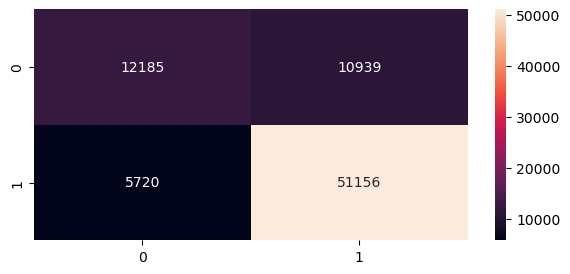

In [202]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)),
           annot=True,
           fmt='0.0f')

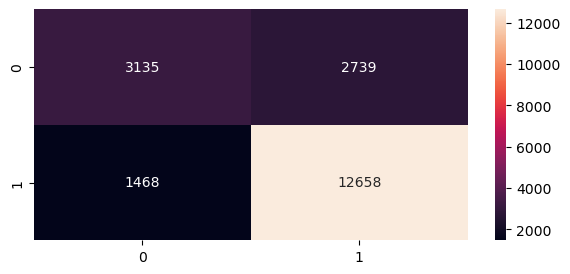

In [203]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)),
           annot=True,
           fmt='0.0f');

### Tuning hyperparameters using GridSearchCV

In [204]:
# parameters = {
#     'C':np.linspace(0.1, 1.1, 11),
#     'penalty':['l1', 'l2'],
#     'solver':['liblinear', 'saga'],
#     'class_weight':['balanced', None]
# }

# gridsearchcv = GridSearchCV(LogisticRegression(max_iter=100), parameters, cv=5, n_jobs=-1)

# gridsearchcv.fit(X_train_std, y_train)

# gridsearchcv.best_params_

In [205]:
best_params = {'C': 0.4, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

lr_tuned = LogisticRegression(C = 0.4, class_weight=None, penalty = 'l2', solver='liblinear')

lr_tuned.fit(X_train_std, y_train)

LogisticRegression(C=0.4, solver='liblinear')

In [206]:
print(f'Training accurecy:{accuracy_score(y_train, lr_tuned.predict(X_train_std))}')
print(f'Test accurecy:{accuracy_score(y_test, lr_tuned.predict(X_test_std))}')
print(f'Training precision:{precision_score(y_train, lr_tuned.predict(X_train_std))}')
print(f'Test precision:{precision_score(y_test, lr_tuned.predict(X_test_std))}')
print(f'Training recall:{recall_score(y_train, lr_tuned.predict(X_train_std))}')
print(f'Test recall:{recall_score(y_test, lr_tuned.predict(X_test_std))}')
print(f'Training f1 score:{f1_score(y_train, lr_tuned.predict(X_train_std))}')
print(f'Test f1 score:{f1_score(y_test, lr_tuned.predict(X_test_std))}')

Training accurecy:0.7916375
Test accurecy:0.78995
Training precision:0.8237330713860127
Test precision:0.8223030460479314
Training recall:0.8993775933609959
Test recall:0.8962905281042051
Training f1 score:0.8598949359109056
Test f1 score:0.8577041628560783


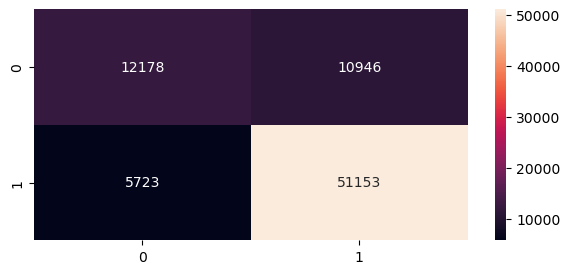

In [207]:
sns.heatmap(confusion_matrix(y_train, lr_tuned.predict(X_train_std)),
           annot=True,
           fmt = '0.0f');

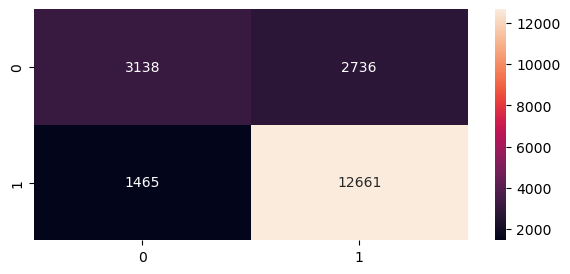

In [208]:
sns.heatmap(confusion_matrix(y_test, lr_tuned.predict(X_test_std)),
           annot=True,
           fmt = '0.0f');

### Tuning Hyperparameters using optuna

In [209]:
def objective(trial):
    
    C = trial.suggest_float('C', 0.01, 1.1)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])
    
    model = LogisticRegression(max_iter = 1000,
                              C = C,
                              penalty = penalty,
                              solver = solver,
                              class_weight = class_weight)
    
    score = cross_val_score(model, X_train_std, y_train, cv=3)
    accurecy = score.mean()
    return accurecy

In [210]:
# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=10)

In [211]:
# study.best_params

In [212]:
lr_tuned_optuna = LogisticRegression(C = 1.0333930753606335, class_weight=None, penalty = 'l2', solver='saga')

lr_tuned_optuna.fit(X_train_std, y_train)

LogisticRegression(C=1.0333930753606335, solver='saga')

In [213]:
print(f'Training accurecy:{accuracy_score(y_train, lr_tuned_optuna.predict(X_train_std))}')
print(f'Test accurecy:{accuracy_score(y_test, lr_tuned_optuna.predict(X_test_std))}')
print(f'Training precision:{precision_score(y_train, lr_tuned_optuna.predict(X_train_std))}')
print(f'Test precision:{precision_score(y_test, lr_tuned_optuna.predict(X_test_std))}')
print(f'Training recall:{recall_score(y_train, lr_tuned_optuna.predict(X_train_std))}')
print(f'Test recall:{recall_score(y_test, lr_tuned_optuna.predict(X_test_std))}')
print(f'Training f1 score:{f1_score(y_train, lr_tuned_optuna.predict(X_train_std))}')
print(f'Test f1 score:{f1_score(y_test, lr_tuned_optuna.predict(X_test_std))}')

Training accurecy:0.7916625
Test accurecy:0.7899
Training precision:0.8237387481683065
Test precision:0.8222496428107546
Training recall:0.8994127575778887
Test recall:0.8962905281042051
Training f1 score:0.8599141010447398
Test f1 score:0.8576751117734724


* We have optimized hyperparameters using two techniques and both techniques give similer accurecy.
* GridSearchCV took a lot more time then optuna.
* Going forward, we will use optuna for tuning hyperparameters.

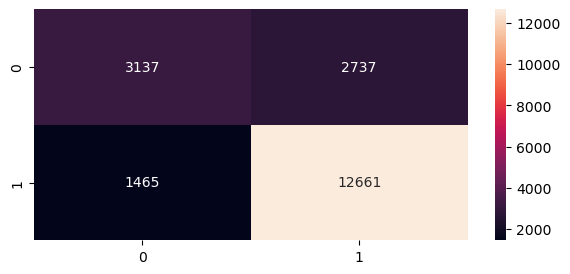

In [214]:
sns.heatmap(confusion_matrix(y_test, lr_tuned_optuna.predict(X_test_std)),
           annot=True,
           fmt='0.0f');

## Decision Tree

In [215]:
dt = DecisionTreeClassifier(max_depth = 10)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [216]:
print(f'Training accurecy:{accuracy_score(y_train, dt.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, dt.predict(X_test))}')
print(f'Training precision:{precision_score(y_train, dt.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, dt.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, dt.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, dt.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, dt.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, dt.predict(X_test))}')

Training accurecy:0.8510875
Test accurecy:0.83805
Training precision:0.8830876714663032
Test precision:0.8708864209307079
Training recall:0.9111751881285604
Test recall:0.9048562933597621
Training f1 score:0.89691158781942
Test f1 score:0.8875464361351248


### Tuning Hyperparameters using optuna

In [217]:
def objective(trial):
    
    max_depth = trial.suggest_int('max_depth', 5, 20)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    model = DecisionTreeClassifier(max_depth = max_depth,
                                  criterion = criterion,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf)
    
    score = cross_val_score(model, X_train, y_train, cv = 5)
    accurecy = score.mean()
    return accurecy

In [218]:
# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=20)

In [219]:
# study.best_params

In [220]:
dt_tuned = DecisionTreeClassifier(max_depth = 12,
                                 criterion = 'gini',
                                 min_samples_split = 7,
                                 min_samples_leaf = 2)

dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=7)

In [221]:
print(f'Training accurecy:{accuracy_score(y_train, dt_tuned.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, dt_tuned.predict(X_test))}')
print(f'Training precision:{precision_score(y_train, dt_tuned.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, dt_tuned.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, dt_tuned.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, dt_tuned.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, dt_tuned.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, dt_tuned.predict(X_test))}')

Training accurecy:0.8617125
Test accurecy:0.84235
Training precision:0.8883049956773067
Test precision:0.8727495074393641
Training recall:0.9213376468106055
Test recall:0.9093869460569163
Training f1 score:0.9045198373997774
Test f1 score:0.8906916276651066


* Model is overfitting after hyperpparameter tuning also.
* We will check Random Forest

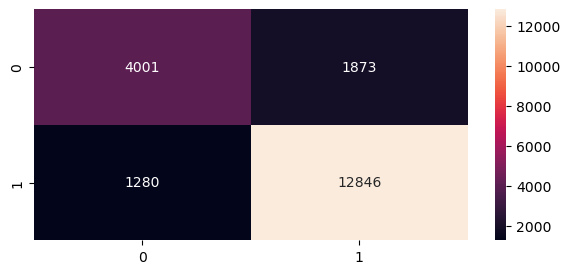

In [222]:
sns.heatmap(confusion_matrix(y_test, dt_tuned.predict(X_test)),
           annot=True,
           fmt='0.0f');

## Random Forest

In [223]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [224]:
print(f'Training accurecy:{accuracy_score(y_train, rf.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, rf.predict(X_test))}')
print(f'Trainin precision:{precision_score(y_train, rf.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, rf.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, rf.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, rf.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, rf.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, rf.predict(X_test))}')

Training accurecy:0.8494
Test accurecy:0.8377
Trainin precision:0.8684816203064378
Test precision:0.8583662714097496
Training recall:0.928827625008791
Test recall:0.9224125725612347
Training f1 score:0.897641541493917
Test f1 score:0.8892376987647581


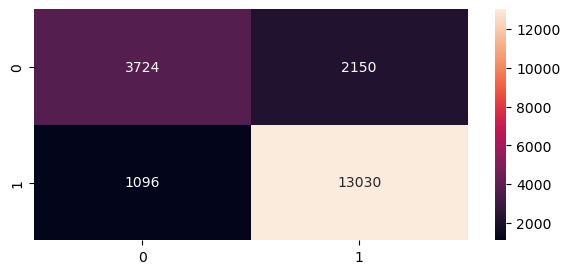

In [225]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)),
           annot=True,
           fmt='0.0f');

### Tuning hyperparameters using optuna

In [226]:
def objective(trail):
    n_estimators = trail.suggest_int('n_estimators', 100, 500)
    max_depth = trail.suggest_int('max_depth', 5, 20)
    criterion = trail.suggest_categorical('criterion', ['gini', 'entropy'])
    min_samples_split = trail.suggest_int('min_sample_split', 2, 10)
    min_samples_leaf = trail.suggest_int('min_sample_leaf', 1, 5)
    
    
    model = RandomForestClassifier(n_estimators = n_estimators,
                        max_depth = max_depth,
                        criterion = criterion)
    
    score = cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1)
    accurecy = score.mean()
    return accurecy

In [227]:
# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=20)

In [228]:
# study.best_params

In [229]:
rf_tuned = RandomForestClassifier(n_estimators = 266,
                                     max_depth = 20,
                                     criterion = 'gini',
                                     min_samples_split = 2,
                                     min_samples_leaf = 1,
                                     random_state=42)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=266, random_state=42)

In [230]:
print(f'Training accurecy:{accuracy_score(y_train, rf_tuned.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, rf_tuned.predict(X_test))}')
print(f'Trainin precision:{precision_score(y_train, rf_tuned.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, rf_tuned.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, rf_tuned.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, rf_tuned.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, rf_tuned.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, rf_tuned.predict(X_test))}')

Training accurecy:0.9520125
Test accurecy:0.8794
Trainin precision:0.95415389357949
Test precision:0.9070753405615791
Training recall:0.979569589985231
Test recall:0.9238991929774883
Training f1 score:0.96669471748202
Test f1 score:0.9154099740478362


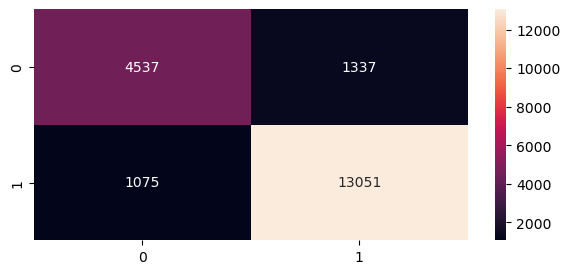

In [231]:
sns.heatmap(confusion_matrix(y_test, rf_tuned.predict(X_test)),
           annot=True,
           fmt='0.0f');

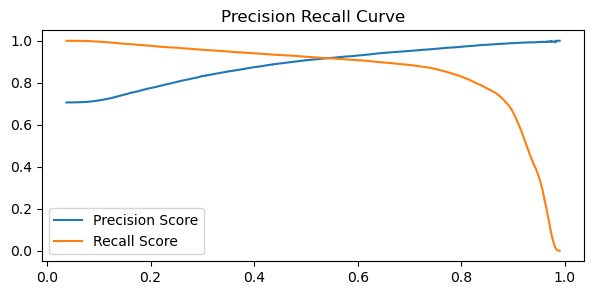

In [232]:
from sklearn.metrics import precision_recall_curve

p_value, r_value, t_value = precision_recall_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])

plt.plot(t_value, p_value[:-1], label='Precision Score')
plt.plot(t_value, r_value[:-1], label="Recall Score")

plt.title("Precision Recall Curve")
plt.legend()
plt.show()

In [233]:
# study.best_params

In [234]:
# rf_tuned = RandomForestClassifier(n_estimators = 106,
#                                      max_depth = 20,
#                                      criterion = 'entropy',
#                                      random_state=42)

# rf_tuned.fit(X_train, y_train)

In [235]:
# print(f'Training accurecy:{accuracy_score(y_train, rf_tuned.predict(X_train))}')
# print(f'Test accurecy:{accuracy_score(y_test, rf_tuned.predict(X_test))}')
# print(f'Trainin precision:{precision_score(y_train, rf_tuned.predict(X_train))}')
# print(f'Test precision:{precision_score(y_test, rf_tuned.predict(X_test))}')
# print(f'Training recall:{recall_score(y_train, rf_tuned.predict(X_train))}')
# print(f'Test recall:{recall_score(y_test, rf_tuned.predict(X_test))}')
# print(f'Training f1 score:{f1_score(y_train, rf_tuned.predict(X_train))}')
# print(f'Test f1 score:{f1_score(y_test, rf_tuned.predict(X_test))}')

* Tuned models giving the best output but it overfitted little bit.
* We will use orginal model.

In [236]:
# sns.heatmap(confusion_matrix(y_test, rf_tuned.predict(X_test)),
#            annot=True,
#            fmt='0.0f');

## Gradient Boosting Classifier

In [237]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [238]:
print(f'Training accurecy:{accuracy_score(y_train, gb.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, gb.predict(X_test))}')
print(f'Trainin precision:{precision_score(y_train, gb.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, gb.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, gb.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, gb.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, gb.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, gb.predict(X_test))}')

Training accurecy:0.831525
Test accurecy:0.8285
Trainin precision:0.8565981922760887
Test precision:0.8528169943264283
Training recall:0.9164498206624938
Test recall:0.9151210533767521
Training f1 score:0.885513820226628
Test f1 score:0.8828711924600464


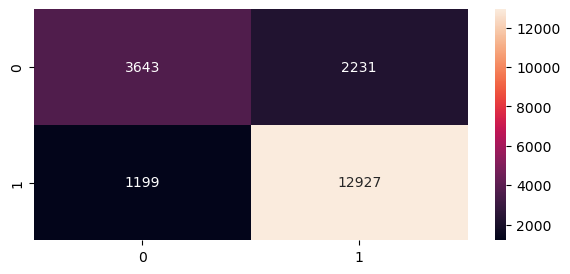

In [239]:
sns.heatmap(confusion_matrix(y_test, gb.predict(X_test)),
           annot=True,
           fmt='0.0f');

In [240]:
### Hyperparameter tuning using Optuna

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    max_depth = trial.suggest_int('max_depth', 5, 12)
    
    model = GradientBoostingClassifier(n_estimators = n_estimators,
                                      learning_rate = learning_rate,
                                      max_depth = max_depth)
    
    score = cross_val_score(model, X_train, y_train, cv = 5, n_jobs = -1)
    accurecy = score.mean()
    return accurecy

In [241]:
# study = optuna.create_study(direction = 'maximize')

# study.optimize(objective, n_trials = 20)

## KNN

In [242]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [243]:
print(f'Training accurecy:{accuracy_score(y_train, knn.predict(X_train_std))}')
print(f'Test accurecy:{accuracy_score(y_test, knn.predict(X_test_std))}')
print(f'Trainin precision:{precision_score(y_train, knn.predict(X_train_std))}')
print(f'Test precision:{precision_score(y_test, knn.predict(X_test_std))}')
print(f'Training recall:{recall_score(y_train, knn.predict(X_train_std))}')
print(f'Test recall:{recall_score(y_test, knn.predict(X_test_std))}')
print(f'Training f1 score:{f1_score(y_train, knn.predict(X_train_std))}')
print(f'Test f1 score:{f1_score(y_test, knn.predict(X_test_std))}')

Training accurecy:0.916725
Test accurecy:0.8816
Trainin precision:0.9565075093639769
Test precision:0.9257676709154113
Training recall:0.9249243969336803
Test recall:0.9049270848081552
Training f1 score:0.940450864365268
Test f1 score:0.9152287534903701


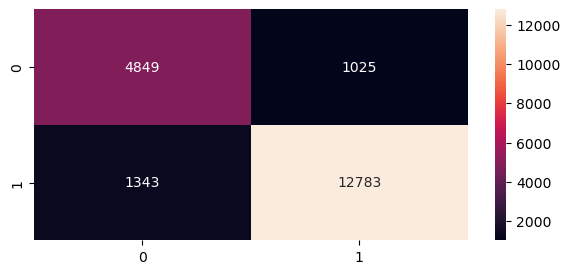

In [244]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_std)),
           annot=True,
           fmt='0.0f');

In [245]:
## Hyperparameters Tuning

def objective(trial):
    
    n_neighbors = trial.suggest_int('n_neighbors', 5, 30)
    
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    
    score = cross_val_score(model, X_train, y_train)
    accurecy = score.mean()
    return accurecy

In [246]:
# study = optuna.create_study(direction = 'maximize')

# study.optimize(objective, n_trials = 30)

In [247]:
# study.best_params

* We have already trained our model using n_neighbors = 5.
* Random Forest model gave the best result.

## XGBClassifier

In [265]:
xgb = XGBClassifier(objective='binary:logistic',
                    eval_metric='logloss',
                    learning_rate=0.01,
                    n_estimators=100)


xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [266]:
print(f'Training accurecy:{accuracy_score(y_train, xgb.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, xgb.predict(X_test))}')
print(f'Trainin precision:{precision_score(y_train, xgb.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, xgb.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, xgb.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, xgb.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, xgb.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, xgb.predict(X_test))}')

Training accurecy:0.83295
Test accurecy:0.8301
Trainin precision:0.850451030927835
Test precision:0.8468701500258665
Training recall:0.9282649975385048
Test recall:0.9270848081551748
Training f1 score:0.8876559400114328
Test f1 score:0.885163906725245


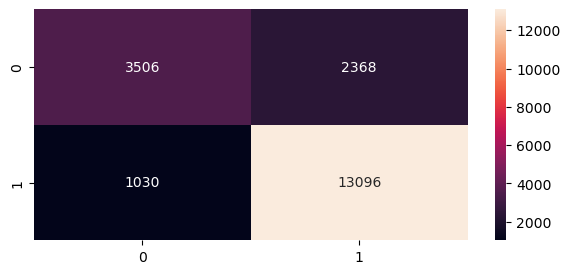

In [267]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)),
           annot=True,
           fmt='0.0f');

## ROC-AUC scores for all models

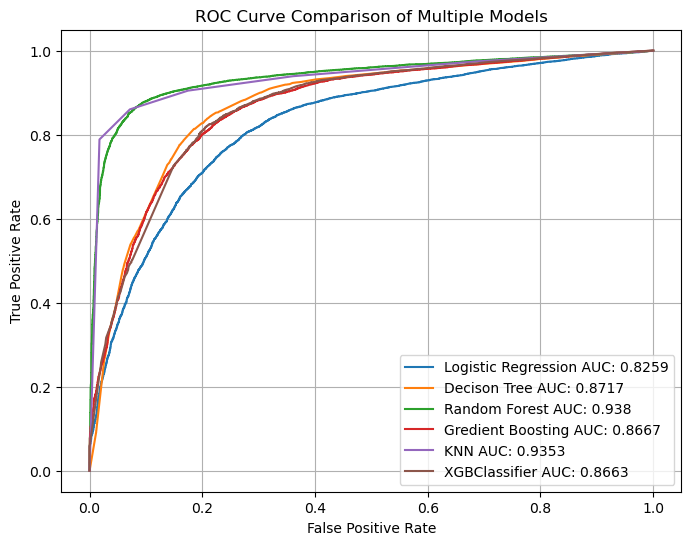

In [278]:
plt.figure(figsize=(8,6))

## Logistic Regression
y_pred_lr = lr_tuned.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

## Decision Tree
y_pred_dt = dt_tuned.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresh_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

## Random Forest
y_pred_rf = rf_tuned.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

## Gredient Boosting
y_pred_gb = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresh_gb = roc_curve(y_test, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

## KNN
y_pred_knn = knn.predict_proba(X_test_std)[:,1]
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

## XGBClassifier
y_pred_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression AUC: {roc_auc_lr.round(4)}')
plt.plot(fpr_dt, tpr_dt, label=f'Decison Tree AUC: {roc_auc_dt.round(4)}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC: {roc_auc_rf.round(4)}')
plt.plot(fpr_gb, tpr_gb, label=f'Gredient Boosting AUC: {roc_auc_gb.round(4)}')
plt.plot(fpr_knn, tpr_knn, label=f'KNN AUC: {roc_auc_knn.round(4)}')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBClassifier AUC: {roc_auc_xgb.round(4)}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Multiple Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.legend()
plt.show()

* We are getting the best ROC score for KNN and Random Forest model.
* All models scores are on test data.

## Pipeline

In [215]:
df.dtypes

Age                             float64
Occupation                     category
Num_Bank_Accounts              category
Num_Credit_Card                category
Interest_Rate                   float64
Num_of_Loan                    category
Delay_from_due_date             float64
Num_of_Delayed_Payment          float64
Changed_Credit_Limit            float64
Num_Credit_Inquiries            float64
Credit_Mix                       object
Outstanding_Debt                float64
Credit_Utilization_Ratio        float64
Credit_History_Age              float64
Payment_of_Min_Amount            object
Payment_Behaviour                object
Monthly_Balance                 float64
Credit_Score                      int32
Log_Annual_Income               float64
Log_Monthly_Inhand_Salary       float64
Auto_Loan                      category
Personal_Loan                  category
Credit-builder_Loan            category
Home_Equity_Loan               category
Mortgage_Loan                  category


We have transformed some variables so we will drop original cloumns

### Split the data

In [216]:
X = df.drop('Credit_Score', axis = 1)
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 31), (20000, 31), (80000,), (20000,))

In [217]:
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

In [218]:
y_test.value_counts()

Credit_Score
1    14126
0     5874
Name: count, dtype: int64

In [219]:
X_test.head(3)

,Age,Occupation,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Log_Annual_Income,Log_Monthly_Inhand_Salary,Auto_Loan,Personal_Loan,Credit-builder_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Not_Specified_Loan,No_Data_of_Loan,Log_Total_EMI_per_month,Log_Amount_invested_monthly
75721,30.0,Manager,1.0,5.0,10.0,0.0,9.0,6.0,10.72,0.0,Good,1468.28,29.112468,284.0,No,High_spent_Large_value_payments,554.930282,10.678029,8.213110,No,No,No,No,No,No,No,No,No,Yes,0.000000,3.880299
80184,18.0,Scientist,8.0,7.0,18.0,6.0,18.0,17.0,21.91,9.0,Bad,4766.87,39.849732,98.0,Yes,Low_spent_Small_value_payments,238.314485,9.571590,7.150650,No,Yes,No,No,Yes,Yes,No,No,Yes,No,4.128725,3.100136
19864,41.0,Developer,5.0,2.0,11.0,2.0,3.0,0.0,3.82,3.0,Good,1195.05,21.542892,191.0,No,Low_spent_Small_value_payments,271.756987,11.776251,9.293923,No,No,No,No,Yes,No,Yes,No,No,No,5.324402,4.648533


### Divide the data into numberic and categorical columns

In [220]:
cat_cols = X_train.select_dtypes(include=['O','category']).columns

cat_cols

Index(['Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Auto_Loan',
       'Personal_Loan', 'Credit-builder_Loan', 'Home_Equity_Loan',
       'Mortgage_Loan', 'Student_Loan', 'Debt_Consolidation_Loan',
       'Payday_Loan', 'Not_Specified_Loan', 'No_Data_of_Loan'],
      dtype='object')

In [221]:
num_cols = X_train.select_dtypes(exclude=['O','category']).columns

num_cols

Index(['Age', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Monthly_Balance',
       'Log_Annual_Income', 'Log_Monthly_Inhand_Salary',
       'Log_Total_EMI_per_month', 'Log_Amount_invested_monthly'],
      dtype='object')

### Data Preprocessing

In [222]:
# num_transformer = Pipeline(steps = [
#     ('scaler', StandardScaler())
# ])

cat_transformer = Pipeline(steps = [
    ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [223]:
preprocessing = ColumnTransformer(transformers = [
#     ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
],  remainder='passthrough')

In [224]:
preprocessing.fit_transform(X_train)

array([[0.        , 0.        , 0.        , ..., 9.0520393 , 4.89541071,
        4.62436814],
       [0.        , 0.        , 0.        , ..., 9.17832222, 5.87103586,
        4.32311122],
       [0.        , 0.        , 0.        , ..., 7.6840774 , 5.59570721,
        4.46169247],
       ...,
       [0.        , 0.        , 0.        , ..., 8.66051791, 5.17057025,
        4.35381089],
       [0.        , 0.        , 1.        , ..., 7.55221126, 3.69423793,
        2.61736475],
       [1.        , 0.        , 0.        , ..., 7.25392322, 4.5389333 ,
        3.85561021]])

In [225]:
preprocessing.fit_transform(X_train).shape

(80000, 75)

* We will use a `Random Forest` model

In [226]:
model_rf = Pipeline(steps = [
    ('prep', preprocessing),
    ('model', RandomForestClassifier(n_estimators = 266,
                                     max_depth = 20,
                                     criterion = 'gini',
                                     min_samples_split = 2,
                                     min_samples_leaf = 1,
                                     random_state=42))
])

In [230]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Auto_Loan',
       'Personal_Loan', 'Credit-builder_Loan', 'Home_Equity_Loan',
       'Mortgage_Loan', 'Student_Loan', 'Debt_Consolidation_Loan',
       'Payday_Loan', 'Not_Specified_Loan', 'No_Data_of_Loan'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=266,
                                        random_state=42))])

In [231]:
print(f'Training accurecy:{accuracy_score(y_train, model_rf.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, model_rf.predict(X_test))}')
print(f'Trainin precision:{precision_score(y_train, model_rf.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, model_rf.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, model_rf.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, model_rf.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, model_rf.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, model_rf.predict(X_test))}')

Training accurecy:0.9487
Test accurecy:0.87945
Trainin precision:0.9569162568400638
Test precision:0.9092433452106476
Training recall:0.971587312750545
Test recall:0.921279909386946
Training f1 score:0.9641959798994975
Test f1 score:0.9152220542213158


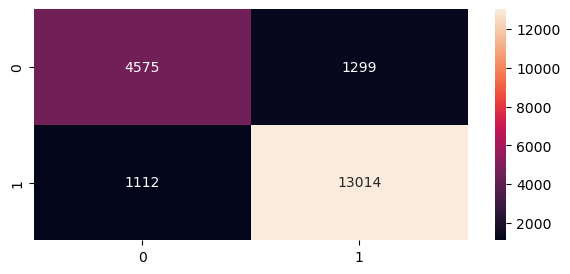

In [238]:
sns.heatmap(confusion_matrix(y_test, model_rf.predict(X_test)),
           annot=True,
           fmt='0.0f');

In [295]:
model_knn = Pipeline(steps = [
    ('prep', preprocessing),
    ('model', KNeighborsClassifier(n_neighbors = 5))
])

In [297]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Monthly_Balance',
       'Log_Annual_Income', 'Log_Monthly_I...
                                                  Index(['Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Auto_Loan',
       'Personal_Loan', 'Credit-builder_Loan', 'Home_Equity_Loan',
       'Mortgage_Loan', 'Student_Loan', 'Debt_Consolidation_Loan',
       'Payday_Loan', 'Not_Specified_Loan', 'No_Data_of_Loan'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [298]:
print(f'Training accurecy:{accuracy_score(y_train, model_knn.predict(X_train))}')
print(f'Test accurecy:{accuracy_score(y_test, model_knn.predict(X_test))}')
print(f'Trainin precision:{precision_score(y_train, model_knn.predict(X_train))}')
print(f'Test precision:{precision_score(y_test, model_knn.predict(X_test))}')
print(f'Training recall:{recall_score(y_train, model_knn.predict(X_train))}')
print(f'Test recall:{recall_score(y_test, model_knn.predict(X_test))}')
print(f'Training f1 score:{f1_score(y_train, model_knn.predict(X_train))}')
print(f'Test f1 score:{f1_score(y_test, model_knn.predict(X_test))}')

Training accurecy:0.9179375
Test accurecy:0.88365
Trainin precision:0.9556908139050414
Test precision:0.9250666474529865
Training recall:0.9275792953090934
Test recall:0.9088914059181651
Training f1 score:0.9414252446934751
Test f1 score:0.9169076950544546


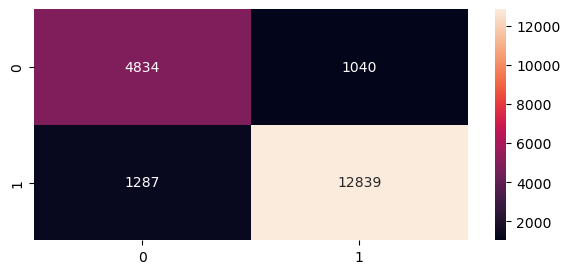

In [299]:
sns.heatmap(confusion_matrix(y_test, model_knn.predict(X_test)),
           annot=True,
           fmt='0.0f');

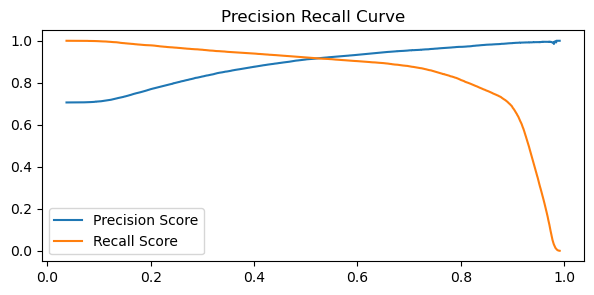

In [294]:
from sklearn.metrics import precision_recall_curve

p_value, r_value, t_value = precision_recall_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.plot(t_value, p_value[:-1], label='Precision Score')
plt.plot(t_value, r_value[:-1], label="Recall Score")

plt.title("Precision Recall Curve")
plt.legend()
plt.show()

In [245]:
feature_names = model_rf.named_steps['prep'].get_feature_names_out()

In [246]:
model = model_rf.named_steps['model']

feature_importance = model.feature_importances_

In [250]:
feature_and_importance= {}

for feature, imporatnce in zip(feature_names, feature_importance):
    original_feature = feature.split('__')[1].rsplit('_',1)[0]
    
    if original_feature in feature_and_importance :
        feature_and_importance[original_feature] += imporatnce
    else:
        feature_and_importance[original_feature] = imporatnce
        
importance_df = pd.DataFrame(feature_and_importance.items(), columns=['Features', 'importance'])

importance_df = importance_df.sort_values('importance', ascending=False).set_index('Features')

importance_df

,importance
Features,
Outstanding,0.154140
Interest,0.107452
Delay_from_due,0.074215
Credit_History,0.072116
Num_Credit,0.066010
Changed_Credit,0.052866
Num_Credit_Card,0.037419
Monthly,0.035153
Num_of_Delayed,0.032605


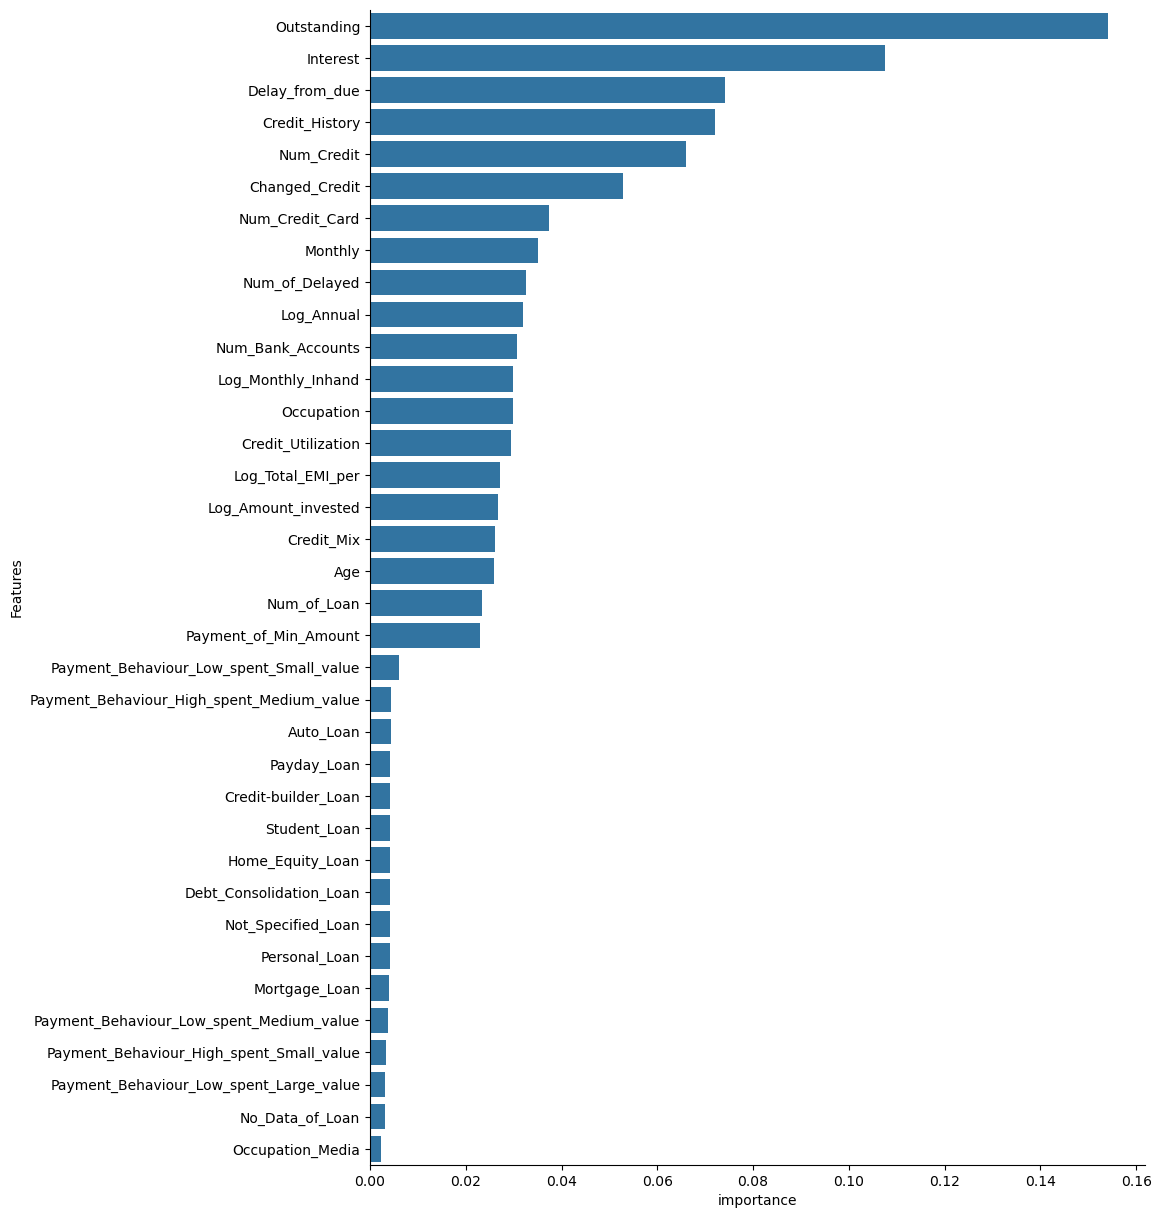

In [251]:
plt.figure(figsize=(10, 15))
sns.barplot(y=importance_df.index, x=importance_df['importance'])
sns.despine()

### Saving model

In [232]:
joblib.dump(model_rf, "model.joblib", compress=3)

['model.joblib']

In [233]:
saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Occupation', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Auto_Loan',
       'Personal_Loan', 'Credit-builder_Loan', 'Home_Equity_Loan',
       'Mortgage_Loan', 'Student_Loan', 'Debt_Consolidation_Loan',
       'Payday_Loan', 'Not_Specified_Loan', 'No_Data_of_Loan'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=266,
                                        random_state=42))])

In [229]:
sns.heatmap(confusion_matrix(y_test, saved_model.predict(X_test)),
           annot=True,
           fmt='0.0f');

NotFittedError: Pipeline is not fitted yet.